## 1. Introduction

One of the global banks would like to understand what are the factors deriving credit card spend? The bank wants to use these insights to calculate the credit limit.<br>
Objective of this case study is to understand **what's driving the total spend (Primary card + Secondary card)**. Given the factors, **predict credit limit for the new applicants**.<br>
Bank has conducted survey on 5000 customers and have collected the data.
Data is present in [CREDIT CARD USERS DATA.csv]() and data details are present in [CREDIT CARD USERS DATA.xslx]()

**Submitted By : _Shriya Jain_**

## 2. Preprations

### 2.1 Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as sm
import statsmodels.formula.api as smf
import pandas_profiling
import pylab

from matplotlib.backends.backend_pdf import PdfPages

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import (LinearRegression, Ridge,Lasso, RandomizedLasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor


C:\Users\Shriya\Software\Anaconda2\lib\site-packages\matplotlib\__init__.py:1389: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### 2.2 Loading Data

In [2]:
# User data
cust_data = pd.read_csv('CREDIT CARD USERS DATA.csv',na_values=['#NULL!'])

In [3]:
# increasing maximum display count to view all columns
pd.options.display.max_columns = None

In [4]:
cust_data.head(2)

custid  region  townsize  gender   age  agecat birthmonth    ed  \
0  3964-QJWTRG-NPN     1.0       2.0     1.0  20.0     2.0  September  15.0   
1  0648-AIPJSP-UVM     5.0       5.0     0.0  22.0     2.0        May  17.0   

   edcat  jobcat  union  employ  empcat  retire  income  lninc  inccat  \
0    3.0     1.0    1.0     0.0     1.0     0.0    31.0   3.43     2.0   
1    4.0     2.0    0.0     0.0     1.0     0.0    15.0   2.71     1.0   

   debtinc  creddebt  lncreddebt  othdebt  lnothdebt  default  jobsat  \
0     11.1      1.20        0.18     2.24       0.81      1.0     1.0   
1     18.6      1.22        0.20     1.57       0.45      1.0     1.0   

   marital  spoused  spousedcat  reside  pets  pets_cats  pets_dogs  \
0      0.0     -1.0        -1.0     3.0   0.0        0.0        0.0   
1      0.0     -1.0        -1.0     2.0   6.0        0.0        0.0   

   pets_birds  pets_reptiles  pets_small  pets_saltfish  pets_freshfish  \
0         0.0            0.0         0.0            0.0             0.0   
1         0.0            0.0         0.0            0.0             6.0   

   homeown  hometype  address  addresscat  cars  carown  cartype  carvalue  \
0      0.0       2.0      0.0         1.0   2.0     1.0      0.0      14.3   
1      1.0       3.0      2.0         1.0   2.0     1.0      1.0       6.8   

   carcatvalue  carbought  carbuy  commute  commutecat  commutetime  \
0          1.0        0.0     0.0      8.0         4.0         22.0   
1          1.0        0.0     0.0      1.0         1.0         29.0   

   commutecar  commutemotorcycle  commutecarpool  commutebus  commuterail  \
0         0.0                1.0             1.0         0.0          0.0   
1         1.0                0.0             0.0         1.0          0.0   

   commutepublic  commutebike  commutewalk  commutenonmotor  telecommute  \
0            0.0          0.0          1.0              0.0          0.0   
1            0.0          1.0          0.0              1.0          1.0   

   reason  polview  polparty  polcontrib  vote  card  cardtype  cardbenefit  \
0     9.0      6.0       1.0         0.0   1.0   3.0       1.0          1.0   
1     9.0      4.0       1.0         0.0   0.0   2.0       4.0          1.0   

   cardfee  cardtenure  cardtenurecat  card2  card2type  card2benefit  \
0      0.0         2.0            2.0    5.0        3.0           1.0   
1      0.0         4.0            2.0    4.0        1.0           3.0   

   card2fee  card2tenure  card2tenurecat  carditems  cardspent  card2items  \
0       0.0          3.0             2.0        5.0      81.66         4.0   
1       0.0          4.0             2.0        5.0      42.60         2.0   

   card2spent  active  bfast  tenure  churn  longmon  lnlongmon  longten  \
0       67.80     0.0    3.0     5.0    1.0      6.5       1.87     34.4   
1       34.94     1.0    1.0    39.0    0.0      8.9       2.19    330.6   

   lnlongten  tollfree  tollmon  lntollmon  tollten  lntollten  equip  \
0       3.54       1.0     29.0       3.37   161.05       5.08    1.0   
1       5.80       0.0      0.0        NaN     0.00        NaN    1.0   

   equipmon  lnequipmon  equipten  lnequipten  callcard  cardmon  lncardmon  \
0     29.50        3.38     126.1        4.84       1.0    14.25       2.66   
1     54.85        4.00    1975.0        7.59       1.0    16.00       2.77   

   cardten  lncardten  wireless  wiremon  lnwiremon  wireten  lnwireten  \
0     60.0       4.09       0.0     0.00        NaN     0.00        NaN   
1    610.0       6.41       1.0    45.65       3.82  1683.55       7.43   

   multline  voice  pager  internet  callid  callwait  forward  confer  ebill  \
0       1.0    1.0    1.0       0.0     0.0       1.0      1.0     1.0    0.0   
1       1.0    1.0    1.0       4.0     1.0       0.0      1.0     0.0    1.0   

   owntv  hourstv  ownvcr  owndvd  owncd  ownpda  ownpc  ownipod  owngame  \
0    1.0     13.0     1.0     1.0    0.0     0.0    0.

In [5]:
# As per objective
cust_data['total_spent'] = cust_data['cardspent']+ cust_data['card2spent']
cust_data.drop(columns=['cardspent','card2spent'],inplace=True)

### 2.3 Idenitifying string and numeric data

In [6]:
def cols_type(df):
    types = {}
    types['numeric'] = [key for key in dict(cust_data.dtypes) if dict(cust_data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
    types['string']=[key for key in dict(cust_data.dtypes) if dict(cust_data.dtypes)[key] in ['object']]
    return(types)

In [7]:
cust_data_col_type = cols_type(cust_data)
cust_data_col_type

{'numeric': ['jobcat',
  'commutemotorcycle',
  'edcat',
  'pets_saltfish',
  'bfast',
  'cardten',
  'retire',
  'commute',
  'card2fee',
  'equip',
  'card2items',
  'pets_freshfish',
  'equipten',
  'debtinc',
  'lncardmon',
  'cardfee',
  'ownpc',
  'lntollten',
  'othdebt',
  'total_spent',
  'callwait',
  'lncreddebt',
  'agecat',
  'commutecat',
  'internet',
  'cardtenurecat',
  'hourstv',
  'spousedcat',
  'lnothdebt',
  'gender',
  'telecommute',
  'homeown',
  'tollfree',
  'commutecarpool',
  'owncd',
  'ed',
  'marital',
  'callid',
  'tollmon',
  'cardbenefit',
  'longmon',
  'lnequipten',
  'voice',
  'commutepublic',
  'spoused',
  'pets',
  'pets_cats',
  'cardtenure',
  'carcatvalue',
  'carbought',
  'cars',
  'polcontrib',
  'callcard',
  'confer',
  'jobsat',
  'reason',
  'address',
  'active',
  'news',
  'ownvcr',
  'card',
  'townsize',
  'cardmon',
  'lninc',
  'region',
  'owndvd',
  'cartype',
  'polview',
  'card2type',
  'inccat',
  'commuterail',
  'resid

In [8]:
cust_data_string = cust_data[cust_data_col_type['string']]
cust_data_numeric = cust_data[cust_data_col_type['numeric']]

In [9]:
# Creating dictionary for birth months 

mon_dict = {}

for index,month in zip(range(len(cust_data.birthmonth.unique())),cust_data.birthmonth.unique()):
    mon_dict[month] = index

mon_dict

{'April': 9,
 'August': 4,
 'December': 8,
 'February': 11,
 'January': 7,
 'July': 3,
 'June': 2,
 'March': 6,
 'May': 1,
 'November': 10,
 'October': 5,
 'September': 0}

converted birthmonth to numeric

In [10]:
cust_data['birthmonth'] = cust_data['birthmonth'].map(mon_dict)

custid is primary key hence not useful for model
dropping custid

In [11]:
cust_data.drop(columns=['custid'],inplace=True)

In [12]:
cust_data_col_type = cols_type(cust_data)
cust_data_col_type

{'numeric': ['jobcat',
  'commutemotorcycle',
  'edcat',
  'pets_saltfish',
  'bfast',
  'cardten',
  'retire',
  'commute',
  'card2fee',
  'equip',
  'card2items',
  'pets_freshfish',
  'equipten',
  'debtinc',
  'lncardmon',
  'cardfee',
  'ownpc',
  'lntollten',
  'othdebt',
  'total_spent',
  'callwait',
  'lncreddebt',
  'agecat',
  'commutecat',
  'internet',
  'cardtenurecat',
  'hourstv',
  'spousedcat',
  'lnothdebt',
  'gender',
  'telecommute',
  'birthmonth',
  'homeown',
  'tollfree',
  'commutecarpool',
  'owncd',
  'ed',
  'marital',
  'callid',
  'tollmon',
  'cardbenefit',
  'longmon',
  'lnequipten',
  'voice',
  'commutepublic',
  'spoused',
  'pets',
  'pets_cats',
  'cardtenure',
  'carcatvalue',
  'carbought',
  'cars',
  'polcontrib',
  'callcard',
  'confer',
  'jobsat',
  'reason',
  'address',
  'active',
  'news',
  'ownvcr',
  'card',
  'townsize',
  'cardmon',
  'lninc',
  'region',
  'owndvd',
  'cartype',
  'polview',
  'card2type',
  'inccat',
  'commut

### 2.4 Identifying continuous and categorical data

In [13]:
# Reading data type from data dictionary work sheet
data_dict = pd.read_excel('CREDIT CARD USERS DATA.xlsx',sheet_name=1)

In [14]:
# Increasing number of rows displayed
pd.options.display.max_rows = None

In [15]:
data_dict

Numeric Variable                                              Label  \
0               custid                                        Customer ID   
1               region                               Geographic indicator   
2             townsize                                   Size of hometown   
3               gender                                             Gender   
4                  age                                       Age in years   
5               agecat                                       Age category   
6           birthmonth                                        Birth month   
7                   ed                                 Years of education   
8                edcat                                 Level of education   
9               jobcat                                       Job category   
10               union                                       Union member   
11              employ                        Years with current employer   
12              empcat                        Years with current employer   
13              retire                                            Retired   
14              income                      Household income in thousands   
15               lninc                                         Log-income   
16              inccat                       Income category in thousands   
17             debtinc                        Debt to income ratio (x100)   
18            creddebt                      Credit card debt in thousands   
19          lncreddebt                               Log-credit card debt   
20             othdebt                            Other debt in thousands   
21           lnothdebt                                     Log-Other debt   
22             default                      Ever defaulted on a bank loan   
23              jobsat                                   Job satisfaction   
24             marital                                     Marital status   
25             spoused                          Spouse years of education   
26          spousedcat                          Spouse level of education   
27              reside                      Number of people in household   
28                pets                               Number of pets owned   
29           pets_cats                               Number of cats owned   
30           pets_dogs                               Number of dogs owned   
31          pets_birds                              Number of birds owned   
32       pets_reptiles                           Number of reptiles owned   
33          pets_small                      Number of small animals owned   
34       pets_saltfish                     Number of saltwater fish owned   
35      pets_freshfish                    Number of freshwater fish owned   
36             homeown                                     Home ownership   
37            hometype                                      Building type   
38             address                           Years at current address   
39          addresscat                           Years at current address   
40                cars                        Number of cars owned/leased   
41              carown                          Primary vehicle lease/own   
42             cartype                    Primary vehicle domestic/import   
43            carvalue                      Primary vehicle sticker price   
44         carcatvalue                     Primary vehicle price category   
45           carbought     Primary vehicle bought/leased within last year   
46              carbuy    Plan to purchase/lease vehicle within next year   
47             commute                     Primary commute transportation   
48          commutecat                                   Commute category   
49         commutetime                            Commute time in minutes   
50          commutecar               Used car to commute within last year   
51

In [16]:
# Reading categorical variables label from data dictionary
cat_var = data_dict['Categorical Variable'].dropna()

# Identifying categorical variables with more than two levels
multilevel_cat_var = pd.Series(cust_data[cust_data[cat_var].T[cust_data[cat_var].nunique()>2].index].nunique(),index=cust_data[cat_var].T[cust_data[cat_var].nunique()>2].index)
multilevel_cat_var.sort_values()

carbought          3
bfast              3
cartype            3
carown             3
carcatvalue        4
card2benefit       4
card2type          4
cardbenefit        4
cardtype           4
hometype           4
card2tenurecat     5
card2              5
cardtenurecat      5
card               5
reason             5
commutecat         5
region             5
addresscat         5
townsize           5
agecat             5
edcat              5
empcat             5
inccat             5
internet           5
jobsat             5
jobcat             6
spousedcat         6
polview            7
cars               9
commute           10
birthmonth        12
card2tenure       31
cardtenure        41
employ            52
address           57
dtype: int64

In [17]:
print('Total columns  ',len(cust_data.columns))
print('Total cat columns  ',len(cat_var))
multilevel_cat_var = multilevel_cat_var.index
print('Multi level columns  ',len(multilevel_cat_var))
bin_var = [col for col in cat_var if col not in multilevel_cat_var]
print('Binary columns ',len(bin_var))
cont_var = list((set(cust_data.columns) - set(cat_var)))
print('Contnuous columns ',len(cont_var))

('Total columns  ', 130)
('Total cat columns  ', 84)
('Multi level columns  ', 35)
('Binary columns ', 49)
('Contnuous columns ', 46)


### 2.5 Data Summary

In [18]:
# Summary for contnuous variables
def cont_var_summary(col):
    return(pd.Series([col.count(),col.isnull().sum(),col.sum(),col.mean(),col.median(),col.std(),col.var(),col.min(),col.dropna().quantile(0.01), col.dropna().quantile(0.05),col.dropna().quantile(0.10),col.dropna().quantile(0.25),col.dropna().quantile(0.50),col.dropna().quantile(0.75), col.dropna().quantile(0.90),col.dropna().quantile(0.95), col.dropna().quantile(0.99),col.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX']))

In [19]:
cust_data[cont_var].apply(lambda x : cont_var_summary(x)).T

N   NMISS         SUM        MEAN  MEDIAN          STD  \
reside          5000.0     0.0    11020.00    2.204000    2.00     1.393977   
lnwiremon       1344.0  3656.0     4845.05    3.604948    3.60     0.390196   
tenure          5000.0     0.0   191024.00   38.204800   38.00    22.661888   
pets_reptiles   5000.0     0.0      278.00    0.055600    0.00     0.325776   
pets_saltfish   5000.0     0.0      233.00    0.046600    0.00     0.469545   
cardten         4998.0     2.0  3600951.00  720.478391  425.00   922.225527   
ed              5000.0     0.0    72715.00   14.543000   14.00     3.281083   
carvalue        5000.0     0.0   116162.90   23.232580   17.00    21.231637   
lnlongten       4997.0     3.0    28039.80    5.611327    5.86     1.649328   
tollten         5000.0     0.0  2889162.55  577.832510    0.00   949.151586   
pets_birds      5000.0     0.0      552.00    0.110400    0.00     0.494227   
pets_small      5000.0     0.0      573.00    0.114600    0.00     0.568798   
wiremon         5000.0     0.0    53505.95   10.701190    0.00    19.799837   
pets_dogs       5000.0     0.0     1962.00    0.392400    0.00     0.796084   
card2items      5000.0     0.0    23333.00    4.666600    5.00     2.497017   
pets_freshfish  5000.0     0.0     9237.00    1.847400    0.00     3.074801   
equipten        5000.0     0.0  2350882.00  470.176400    0.00   912.220624   
longmon         5000.0     0.0    67357.25   13.471450    9.55    12.773381   
lnequipten      1704.0  3296.0    11497.42    6.747312    7.05     1.199236   
debtinc         5000.0     0.0    49770.80    9.954160    8.80     6.399783   
lncardmon       3581.0  1419.0    10419.31    2.909609    2.90     0.565188   
spoused         5000.0     0.0    30564.00    6.112800   -1.00     7.743518   
income          5000.0     0.0   273798.00   54.759600   38.00    55.377511   
pets            5000.0     0.0    15337.00    3.067400    2.00     3.414497   
lntollten       2378.0  2622.0    15658.51    6.584739    6.86     1.221985   
creddebt        5000.0     0.0     9286.82    1.857364    0.93     3.415789   
lnwireten       1344.0  3656.0     9150.06    6.808080    7.15     1.284040   
lnequipmon      1704.0  3296.0     6134.90    3.600293    3.60     0.283426   
othdebt         5000.0     0.0    18272.28    3.654456    2.10     5.395214   
total_spent     5000.0     0.0  2490393.15  498.078630  414.25   351.529270   
lncreddebt      4999.0     1.0     -652.17   -0.130460   -0.08     1.273021   
pets_cats       5000.0     0.0     2502.00    0.500400    0.00     0.860783   
hourstv         5000.0     0.0    98225.00   19.645000   20.00     5.165609   
commutetime     4998.0     2.0   126677.00   25.345538   25.00     5.879149   
longten         4997.0     3.0  3542232.15  708.871753  350.00   979.291072   
wireten         5000.0     0.0  2109923.05  421.984610    0.00  1001.003287   
lnothdebt       4999.0     1.0     3484.05    0.696949    0.74     1.128588   
lncardten       3578.0  1422.0    22992.92    6.426193    6.64     1.172048   
lninc           5000.0     0.0    18499.20    3.699840    3.64     0.746945   
equipmon        5000.0     0.0    64956.55   12.991310    0.00    19.212943   
carditems       5000.0     0.0    50887.00   10.177400   10.00     3.391140   
tollmon         5000.0     0.0    66322.25   13.264450    0.00    16.310018   
lnlongmon       5000.0     0.0    11443.93    2.288786    2.26     0.775100   
lntollmon       2378.0  2622.0     7712.61    3.243318    3.23     0.404821   
cardmon         5000.0     0.0    77219.25   15.443850   13.75    15.007569   
age             5000.0     0.0   235128.00   47.025600   47.00    17.770338   

                         VAR    MIN       P1        P5      P10       P25  \
reside          1.943173e+00   1.00   1.0000    1.0000    1.000    1.0000   
lnwiremon       1.522530e-01   2.54   2.8086    2.9930    3.120    3.3300   
tenure          5.135612e+02   0.00   1.0000    4.0000    7.000   18.0000   

In [20]:
# Summary for categorical variables

def cat_var_summary(col):
    return pd.Series([col.count(), col.isnull().sum(), col.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

In [21]:
# increasing column width 

pd.options.display.max_colwidth = 10000

In [22]:
cust_data[cat_var].apply(lambda x : cat_var_summary(x)).T

N NMISS  \
region             5000     0   
townsize           4998     2   
gender             5000     0   
agecat             5000     0   
birthmonth         5000     0   
edcat              5000     0   
jobcat             5000     0   
union              5000     0   
employ             5000     0   
empcat             5000     0   
retire             5000     0   
inccat             5000     0   
default            5000     0   
jobsat             5000     0   
marital            5000     0   
spousedcat         5000     0   
homeown            5000     0   
hometype           5000     0   
address            5000     0   
addresscat         5000     0   
cars               5000     0   
carown             5000     0   
cartype            5000     0   
carcatvalue        5000     0   
carbought          5000     0   
carbuy             5000     0   
commute            5000     0   
commutecat         5000     0   
commutecar         5000     0   
commutemotorcycle  5000     0   
commutecarpool     5000     0   
commutebus         5000     0   
commuterail        5000     0   
commutepublic      5000     0   
commutebike        5000     0   
commutewalk        5000     0   
commutenonmotor    5000     0   
telecommute        5000     0   
reason             5000     0   
polview            5000     0   
polparty           5000     0   
polcontrib         5000     0   
vote               5000     0   
card               5000     0   
cardtype           5000     0   
cardbenefit        5000     0   
cardfee            5000     0   
cardtenure         5000     0   
cardtenurecat      5000     0   
card2              5000     0   
card2type          5000     0   
card2benefit       5000     0   
card2fee           5000     0   
card2tenure        5000     0   
card2tenurecat     5000     0   
active             5000     0   
bfast              5000     0   
churn              5000     0   
tollfree           5000     0   
equip              5000     0   
callcard           5000     0   
wireless           5000     0   
multline           5000     0   
voice              5000     0   
pager              5000     0   
internet           5000     0   
callid             5000     0   
callwait           5000     0   
forward            5000     0   
confer             5000     0   
ebill              5000     0   
owntv              5000     0   
ownvcr             5000     0   
owndvd             5000     0   
owncd              5000     0   
ownpda             5000     0   
ownpc              5000     0   
ownipod            5000     0   
owngame            5000     0   
ownfax             5000     0   
news               5000     0   
response_01        5000     0   
response_02        5000     0   
response_03        5000     0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ColumnsNames  
region                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

### 2.6 Missing Value Treatment

#### 2.6.1 Continuous data

In [23]:
# Calculating null values percentage
cont_var_null_count = cust_data[cont_var].isna().sum() 
cont_var_null_pct= (cont_var_null_count[cont_var_null_count>0]/cust_data[cont_var].shape[0]) * 100
cont_var_null_pct.sort_values()

lncreddebt      0.02
lnothdebt       0.02
cardten         0.04
commutetime     0.04
lnlongten       0.06
longten         0.06
lncardmon      28.38
lncardten      28.44
lntollten      52.44
lntollmon      52.44
lnequipten     65.92
lnequipmon     65.92
lnwiremon      73.12
lnwireten      73.12
dtype: float64

In [24]:
# identifying variables with less than 1% missing values

cont_var_null_row_drop = (cont_var_null_pct[cont_var_null_pct < 1])
cont_var_null_row_drop

cardten        0.04
lnlongten      0.06
lncreddebt     0.02
commutetime    0.04
longten        0.06
lnothdebt      0.02
dtype: float64

In [25]:
cust_data.shape

(5000, 130)

In [26]:
# dropping rows for variables having less tha 1% missing values

cust_data.drop(cust_data[cust_data[cont_var_null_row_drop.index].isna().any(axis=1)].index,inplace=True)

In [27]:
cust_data.shape

(4994, 130)

6 rows have been dropped based on variables having less than 1% missing values

In [28]:
# columns having greater than 25% missing values

cont_var_null_count = cust_data[cont_var].isna().sum() 
cont_var_null_pct= (cont_var_null_count[cont_var_null_count>0]/cust_data[cont_var].shape[0]) * 100
null_pct_gt25 = cont_var_null_pct[cont_var_null_pct>25].index
null_pct_gt25

Index([u'lnwiremon', u'lnequipten', u'lncardmon', u'lntollten', u'lnwireten',
       u'lnequipmon', u'lncardten', u'lntollmon'],
      dtype='object')

dropping columns having greater than 25% missing values, imputing missing values for such variables would skew the data

In [29]:
cust_data = pd.DataFrame(cust_data.drop(columns=null_pct_gt25))

In [30]:
# No more columns with greater than 25% missing values

cont_var2 = list(set(cont_var) - set(null_pct_gt25))
cont_var_null_count = cust_data[cont_var2].isna().sum() 
cont_var_null_pct= (cont_var_null_count[cont_var_null_count>0]/cust_data[cont_var2].shape[0]) * 100
cont_var_null_pct.sort_values()

Series([], dtype: float64)

#### 2.6.2 Categorical data

In [31]:
# Calculating null values percentage
cat_var_null_count = cust_data[cat_var].isna().sum() 
cat_var_null_pct= (cat_var_null_count[cat_var_null_count>0]/cust_data[cat_var].shape[0]) * 100
cat_var_null_pct.sort_values()

Series([], dtype: float64)

No missing values in categorical variables

Converting float to int under cateogrical variable and converting type as category

In [32]:
for col in cat_var:
    cust_data[col] = cust_data[col].astype('int')
    cust_data[col] = cust_data[col].astype('category')

### 2.7 Outlier Treatment

#### 2.7.1 Applying percentile on continous data

In [33]:
def cont_outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [34]:
cust_data[cont_var2] = cust_data[cont_var2].apply(lambda x : cont_outlier_capping(x))

## 3. Exploratory Data Analysis

### 3.1 Target Variable Distribution

    Regression assumes normality of dependent variable

C:\Users\Shriya\Software\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


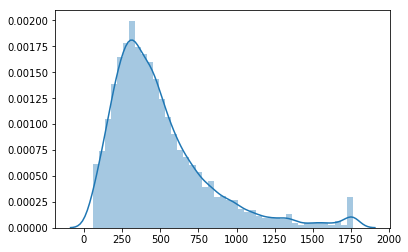

In [35]:
sns.distplot(cust_data[['total_spent']])

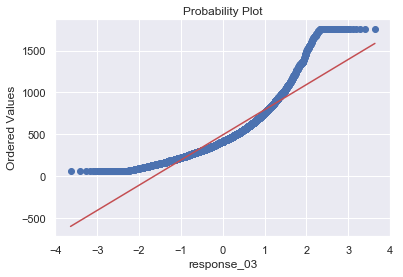

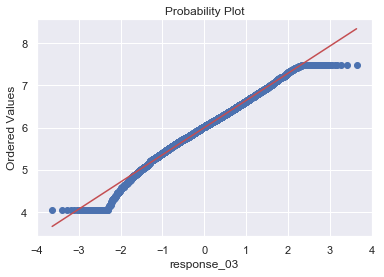

In [36]:
for data in [cust_data['total_spent'],np.log(cust_data['total_spent'])]:
    sns.set(font_scale=1)
    stats.probplot(data, dist="norm", plot=pylab)
    plt.xlabel(col)
    pylab.show()

total spent is left skewed applying log to reduce skewness

In [37]:
cust_data['ln_total_spent'] = np.log(cust_data['total_spent'])
cont_var3 = cont_var2[:]
cont_var3.remove('total_spent')
cont_var3.append('ln_total_spent')

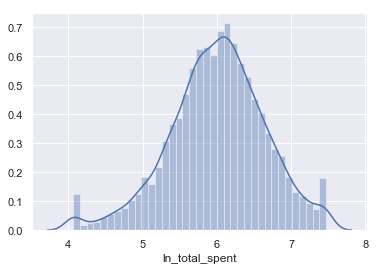

In [38]:
sns.distplot(cust_data['ln_total_spent'])

### 3.2 Normality of continuous variables
    Checking normality of continuous variable to decide whether to apply parametric test or not

In [39]:
# Applying normal test

def test_normal(series,col):
    k2, p = stats.normaltest(series)
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print('Not normal : '+col)
        return(False)
    else:
        print('Normal : '+col)
        return(True)

In [40]:
def get_features(df,all_col=[],target=''):
    if df:
        features = df.columns.difference([target])
        return(features)
    elif all_col:
        features = list(set(all_col)-set([target]))
        return(features)        
    else:
        print('Provide correct arguments')

In [41]:
# Checking if variable or log variable (if all values non zero) is normal 
normal = []
ln_normal=[]
not_normal = []
for col in get_features(df='',all_col=cont_var3,target='ln_total_spent'):
    if test_normal(cust_data[col],col):
        normal.append(col)
    elif not(col.startswith('ln')) and not 0 in cust_data[col] and test_normal(np.log(cust_data[col]),'ln_'+col):
        ln_normal.append(col)
    else:
        not_normal.append(col)
print('\nnormal : ')
print(normal)
print('\nln_normal : ')
print(ln_normal)
print('\nnot_normal : ')
print(not_normal)

Not normal : reside
Not normal : tenure
Not normal : pets_reptiles
Not normal : pets_saltfish
Not normal : cardten
Not normal : ed
Not normal : carvalue
Not normal : tollten
Not normal : pets_birds
Not normal : pets_small
Not normal : wiremon
Not normal : card2items
Not normal : pets_freshfish
Not normal : equipten
Not normal : longmon
Not normal : age
Not normal : debtinc
Not normal : spoused
Not normal : pets
Not normal : income
Not normal : creddebt
Not normal : othdebt
Not normal : pets_dogs
Not normal : lncreddebt
Not normal : pets_cats
Not normal : hourstv
Not normal : commutetime
Not normal : longten
Not normal : wireten
Not normal : lnothdebt
Not normal : lninc
Not normal : lnlongten
Not normal : carditems
Not normal : tollmon
Not normal : lnlongmon
Not normal : cardmon
Not normal : equipmon

normal : 
[]

ln_normal : 
[]

not_normal : 
['reside', 'tenure', 'pets_reptiles', 'pets_saltfish', 'cardten', 'ed', 'carvalue', 'tollten', 'pets_birds', 'pets_small', 'wiremon', 'card2ite

non parametric tests would be performed

### 3.3 Lineplot for continuous variables

C:\Users\Shriya\Software\Anaconda2\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


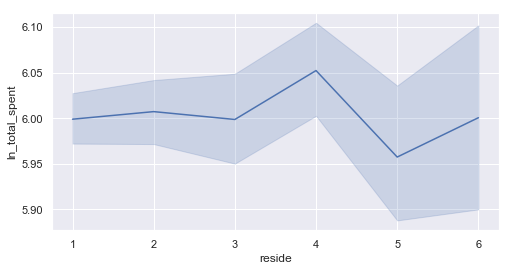

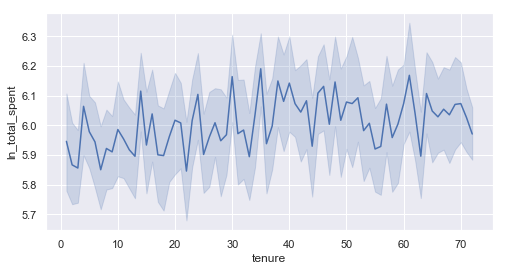

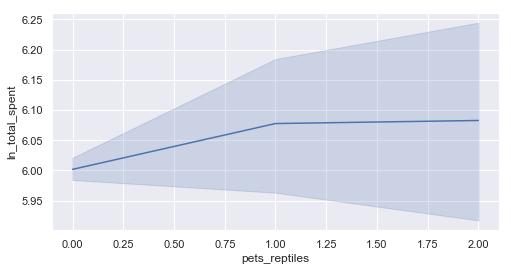

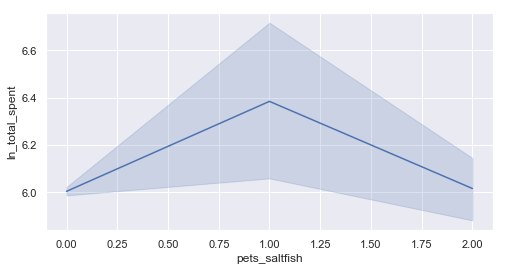

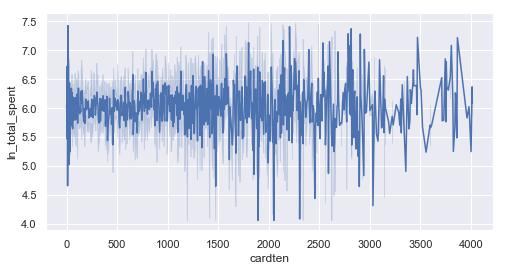

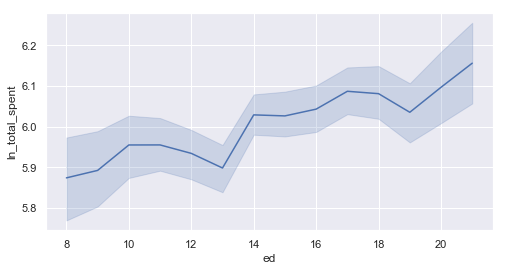

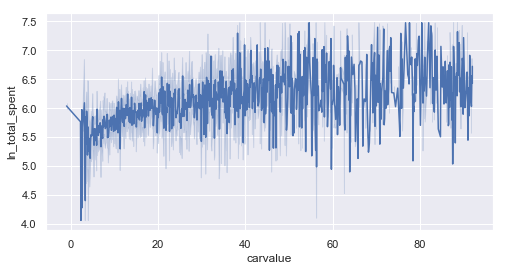

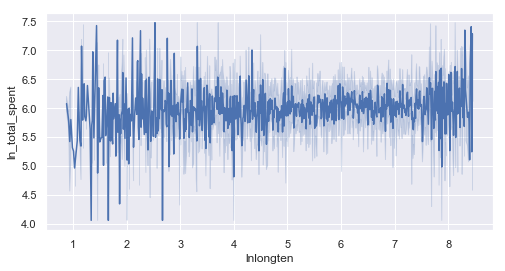

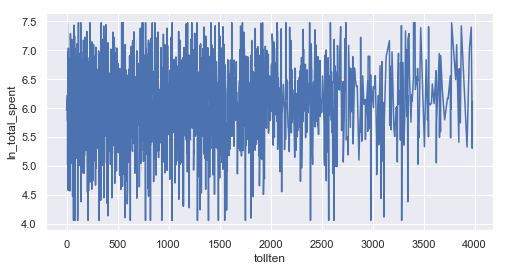

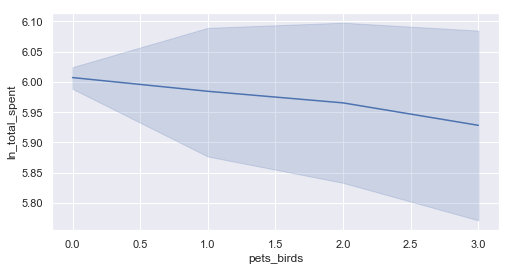

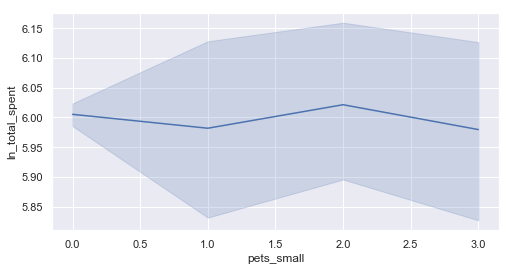

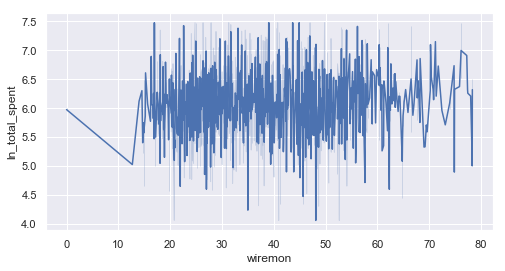

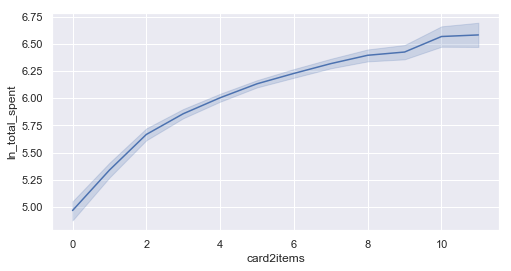

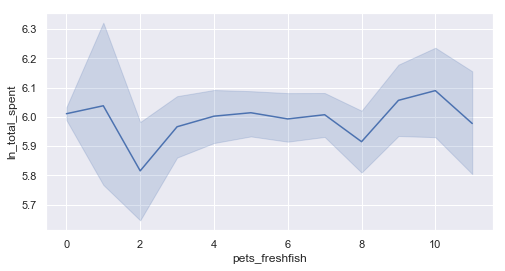

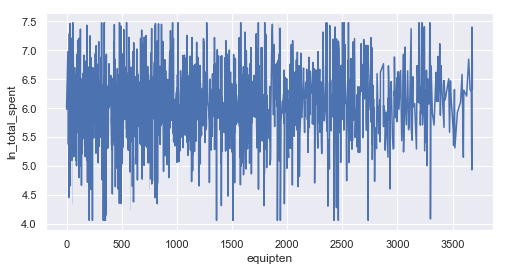

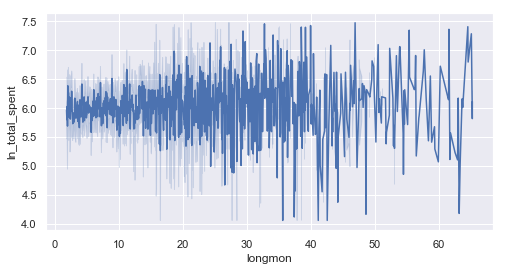

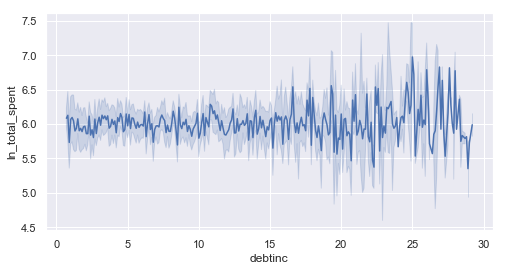

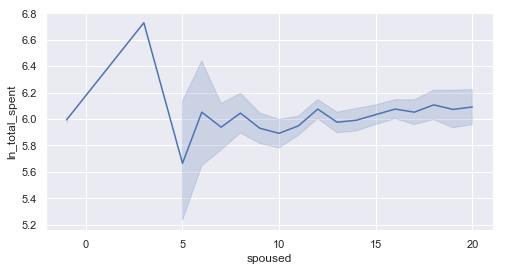

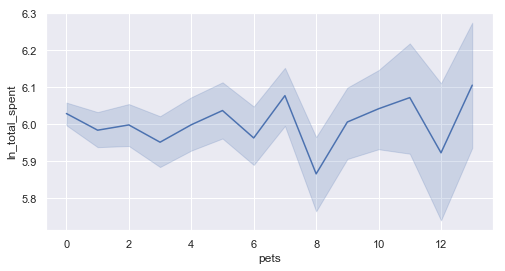

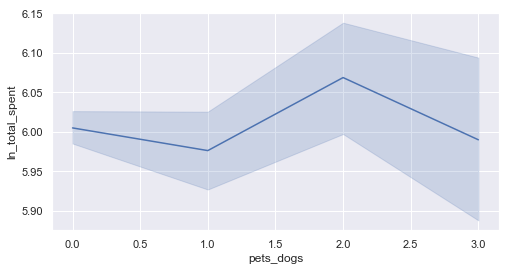

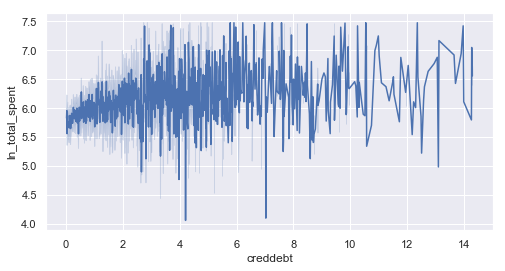

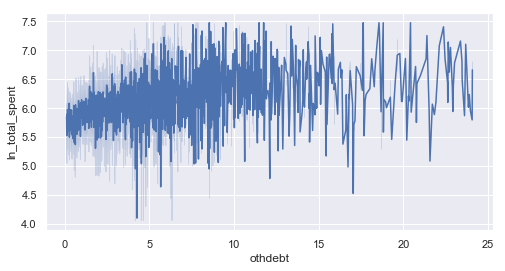

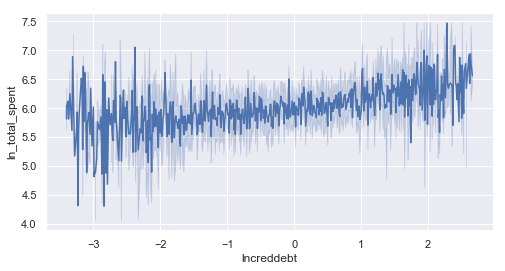

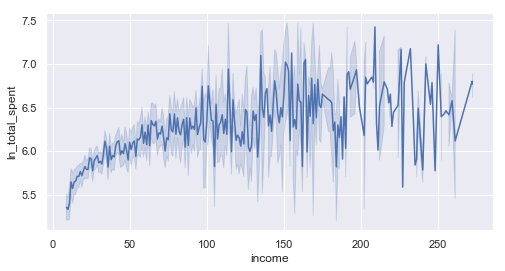

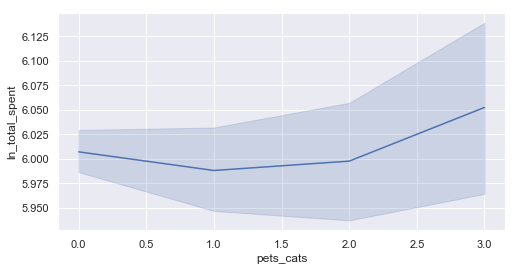

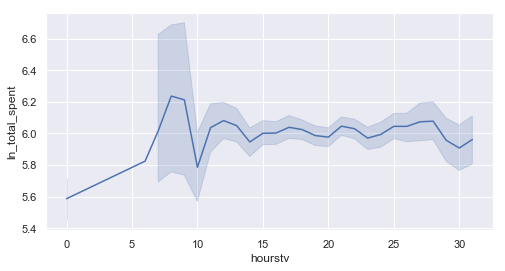

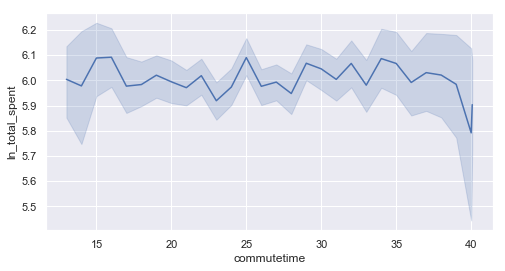

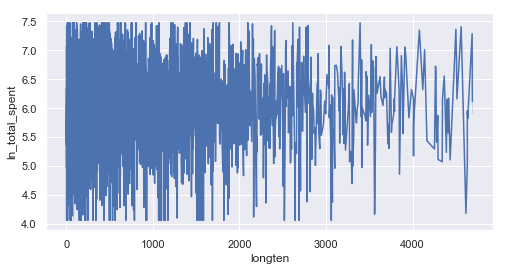

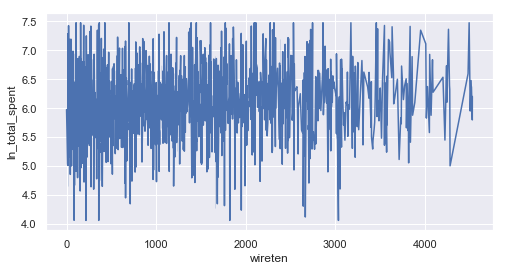

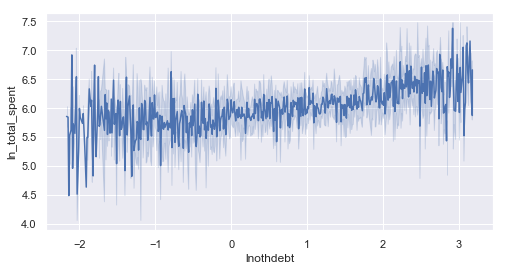

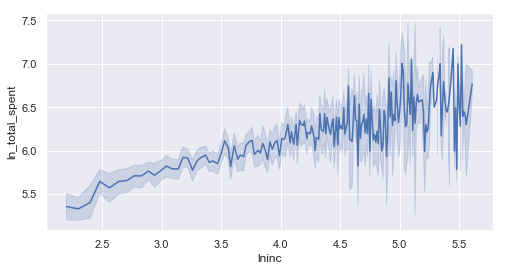

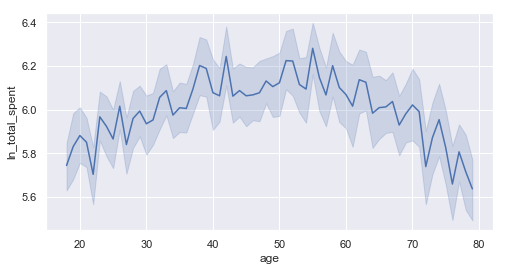

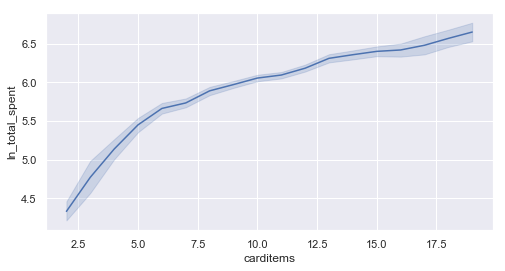

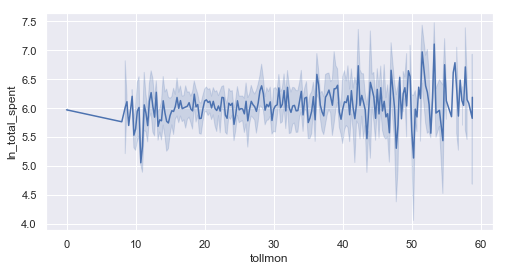

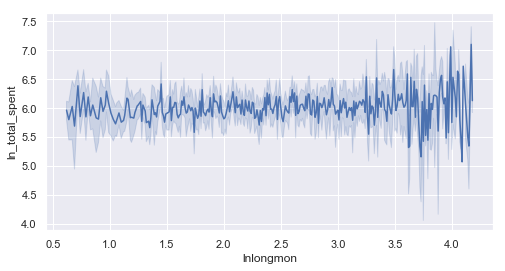

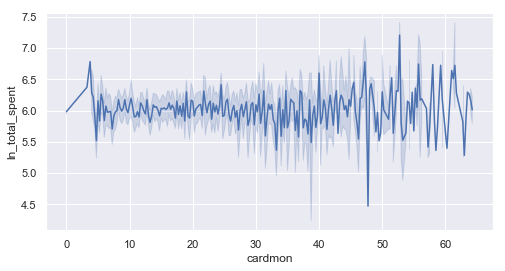

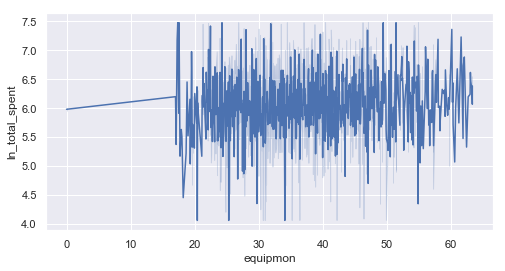

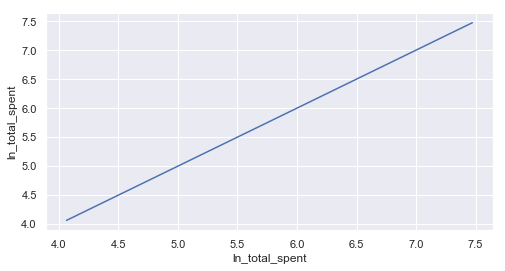

In [42]:
lp = PdfPages('Lineplot for continuous variables.pdf')

for col in cont_var3:
    fig,axes = plt.subplots(figsize=(8,4))
    sns.lineplot(x=col, y='ln_total_spent', data=cust_data)
    lp.savefig(fig)
lp.close() 

In [43]:
# dropping carditems and card2items as these would cause overfitting

cont_var3.remove('carditems')
cont_var3.remove('card2items')

### 3.4 Boxplot for categorical variables

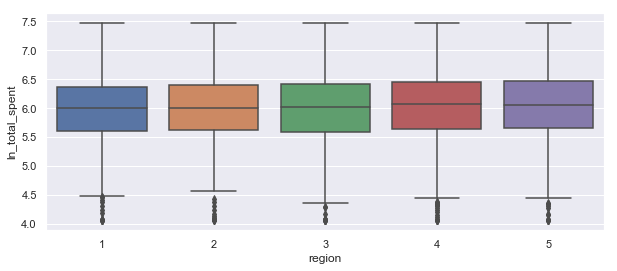

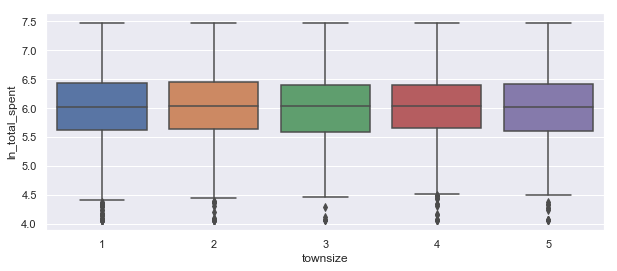

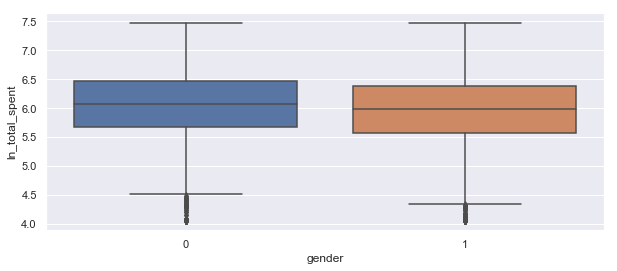

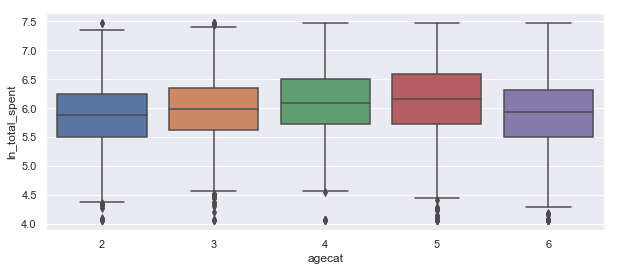

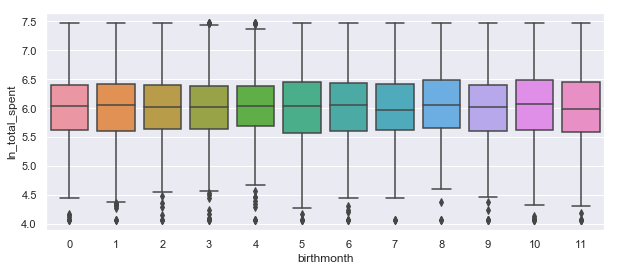

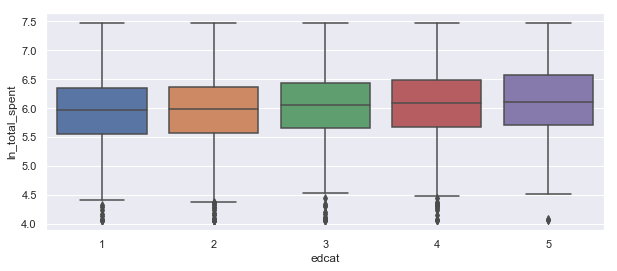

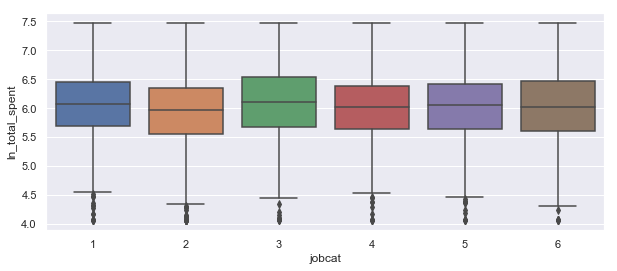

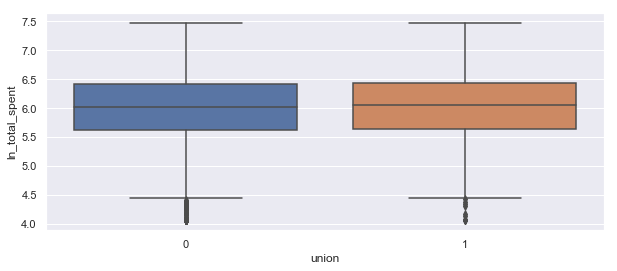

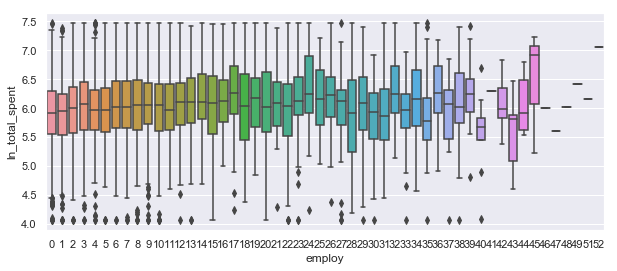

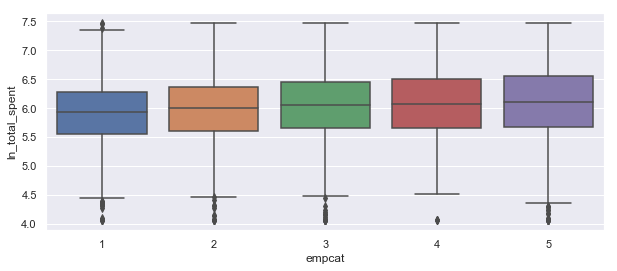

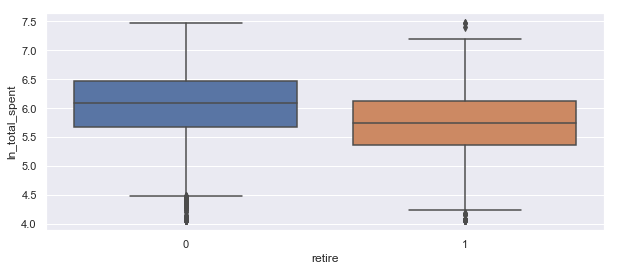

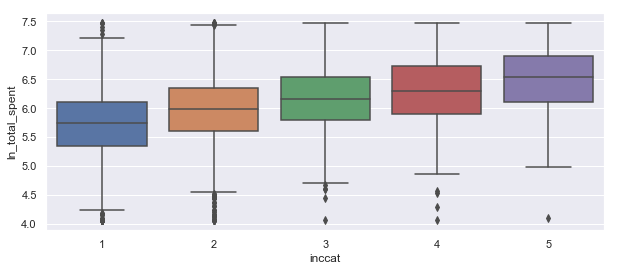

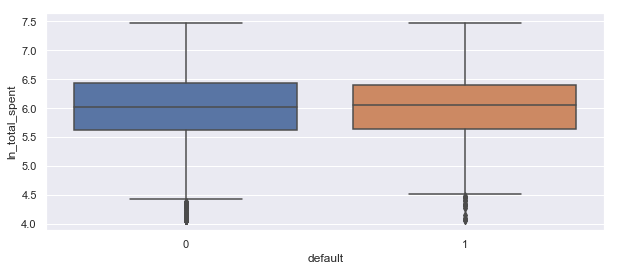

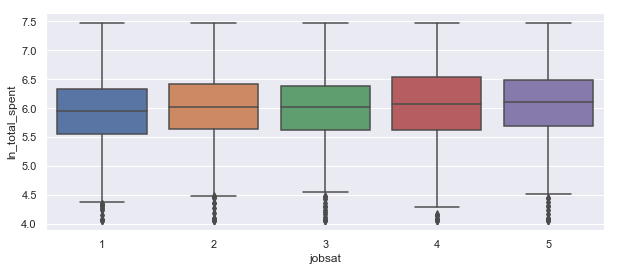

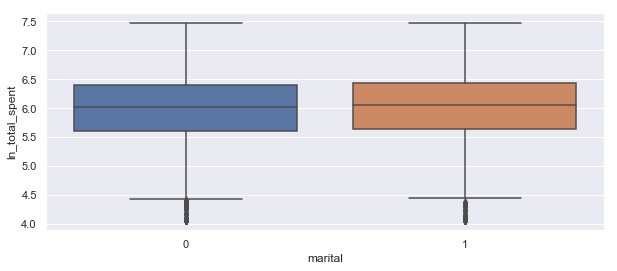

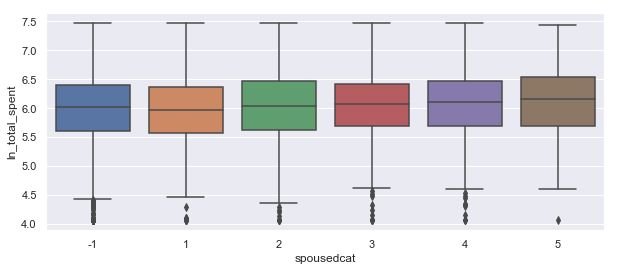

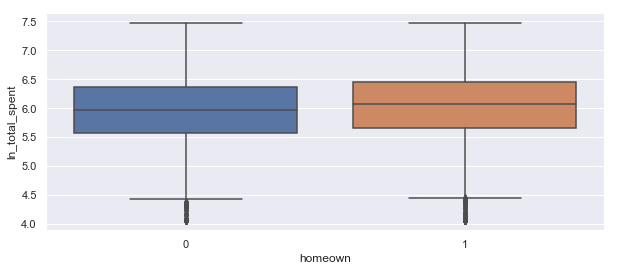

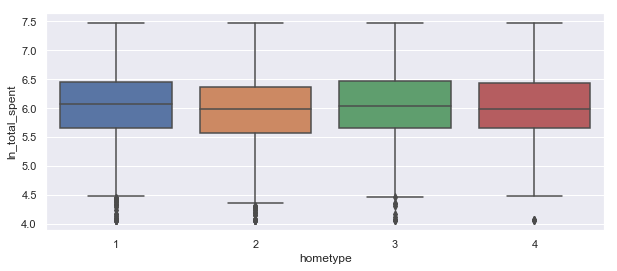

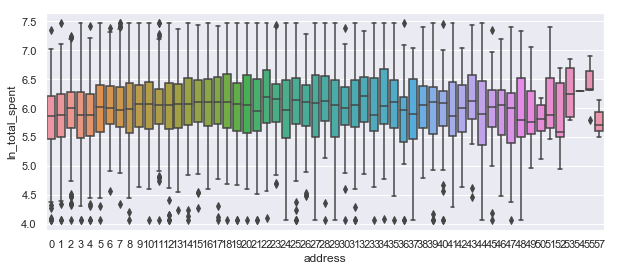

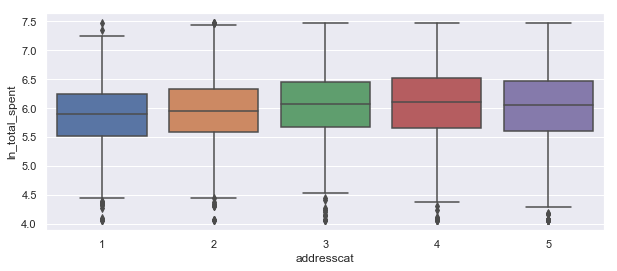

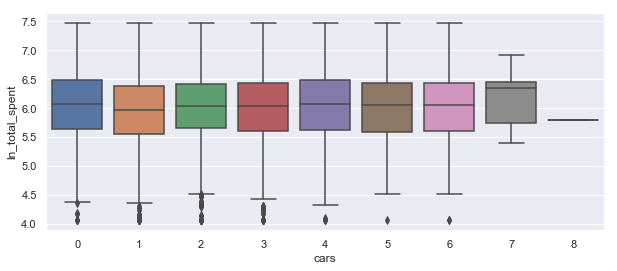

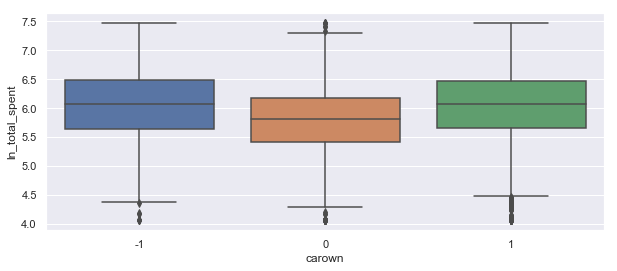

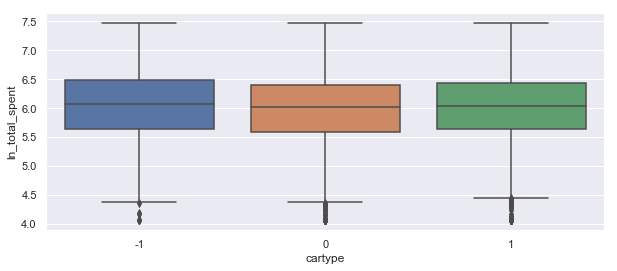

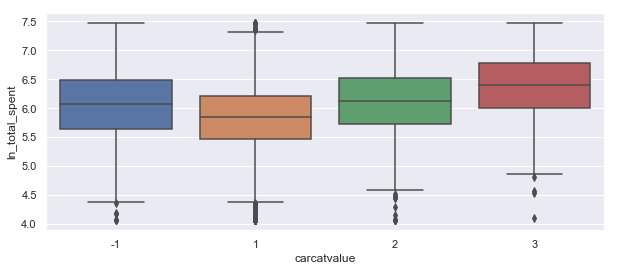

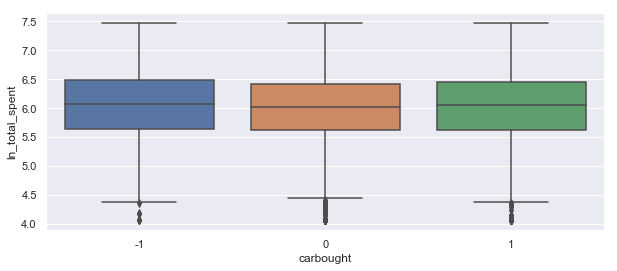

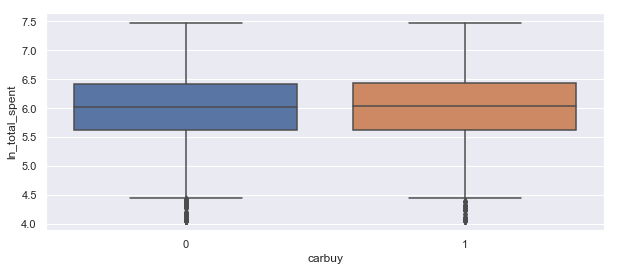

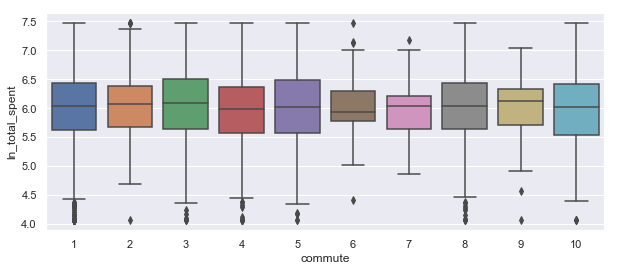

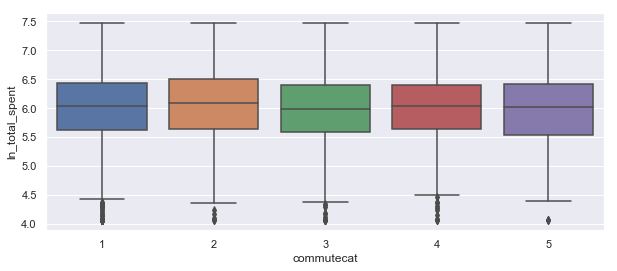

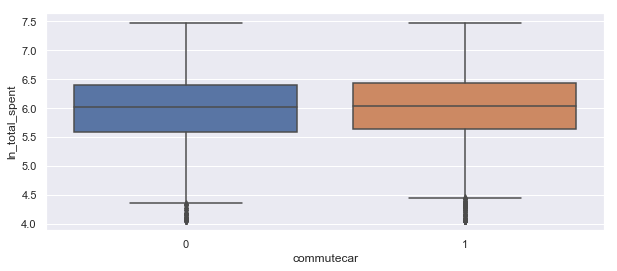

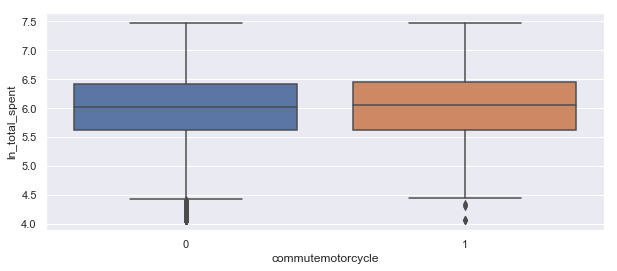

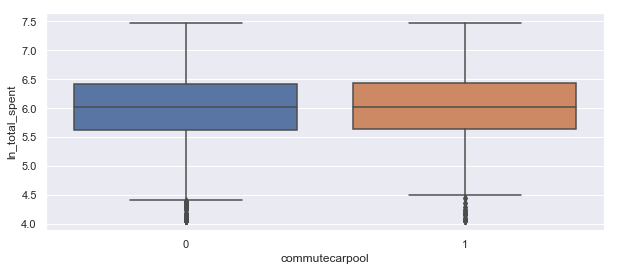

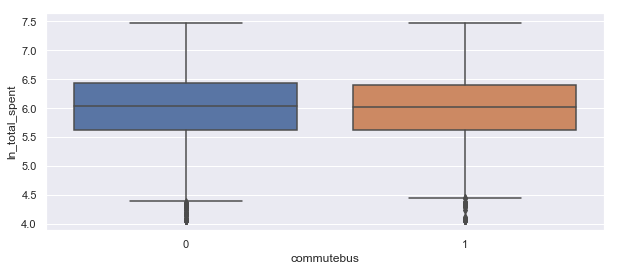

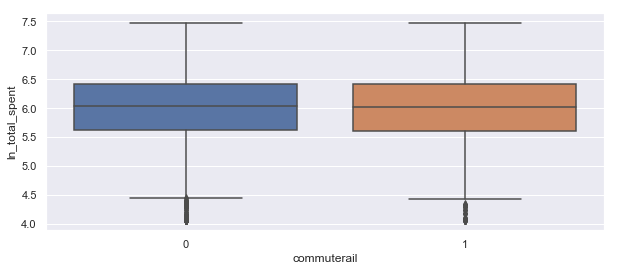

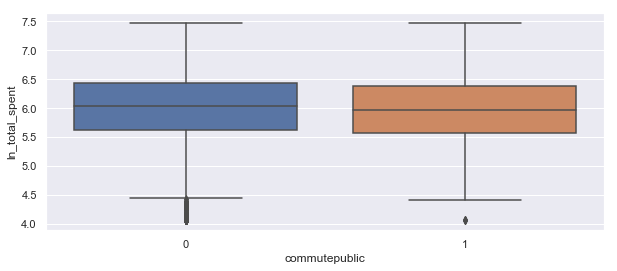

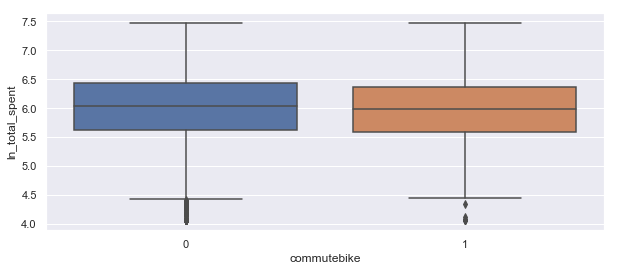

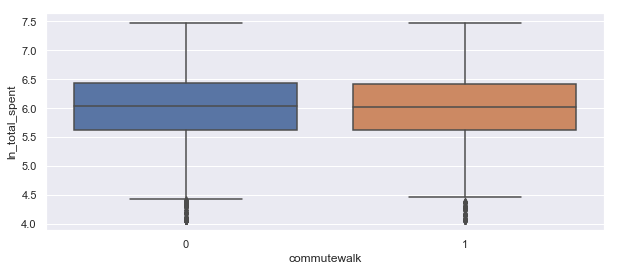

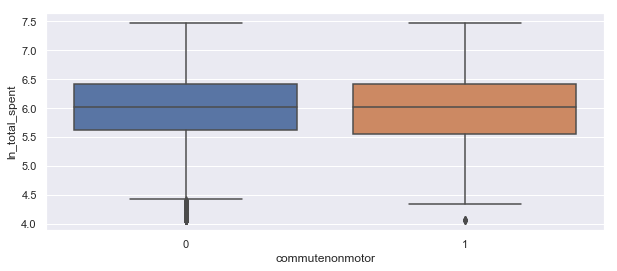

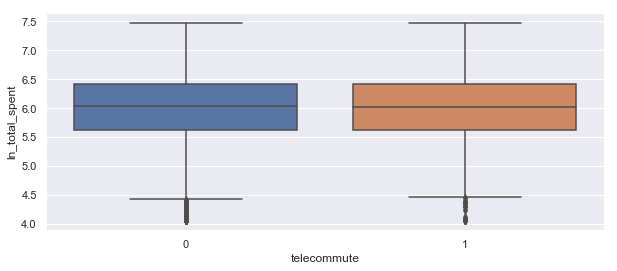

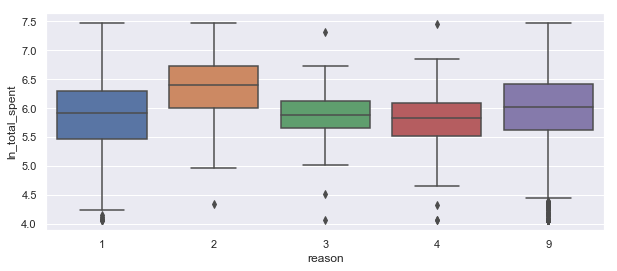

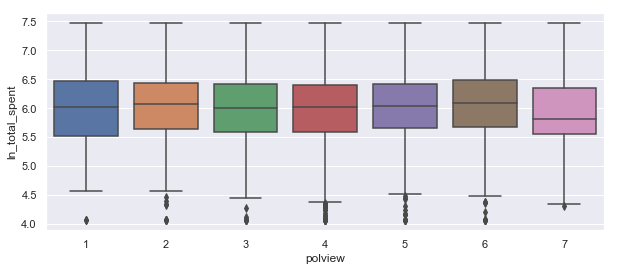

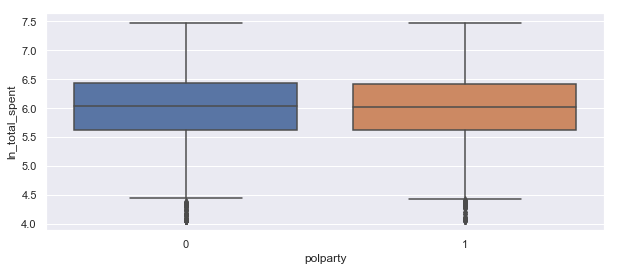

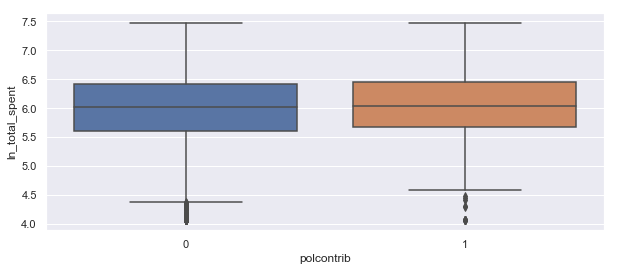

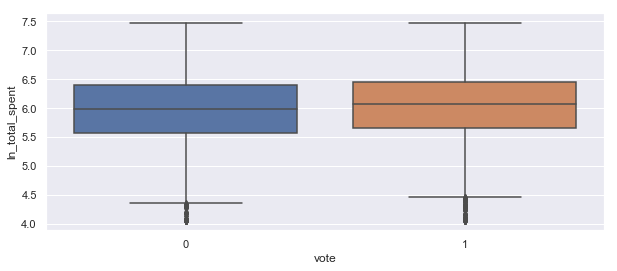

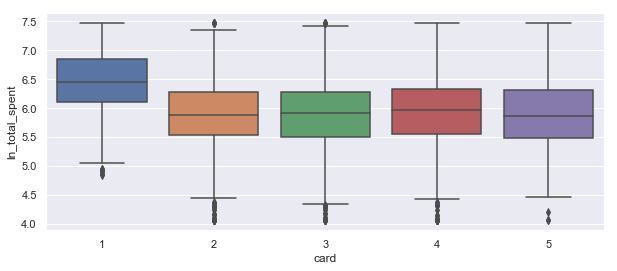

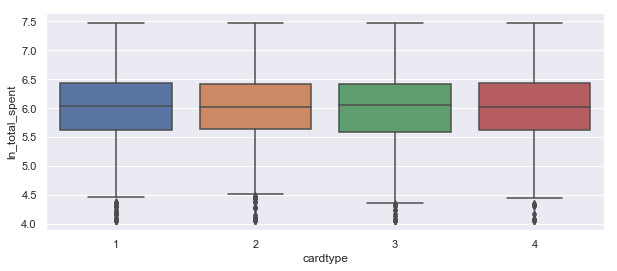

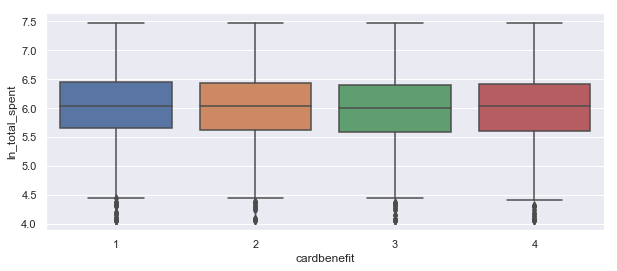

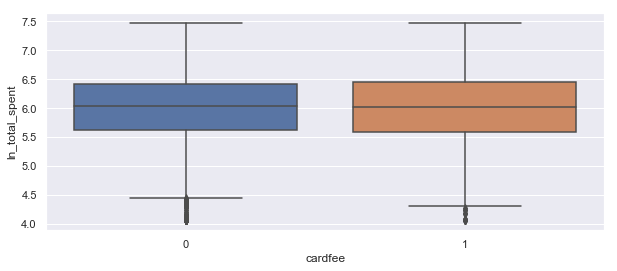

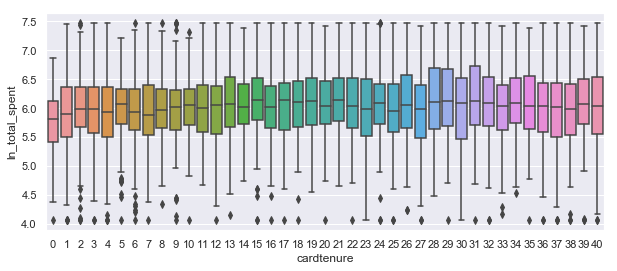

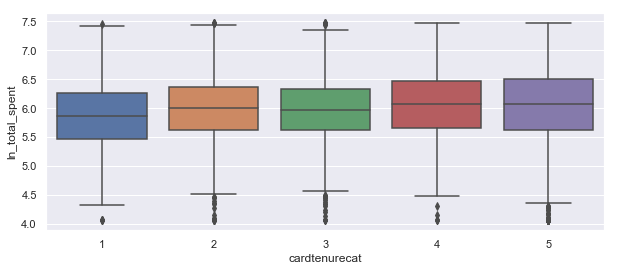

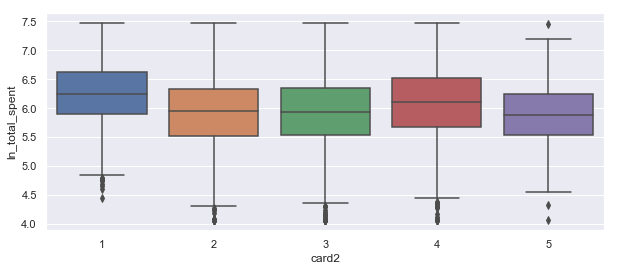

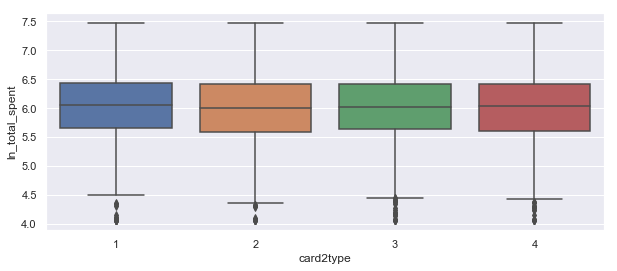

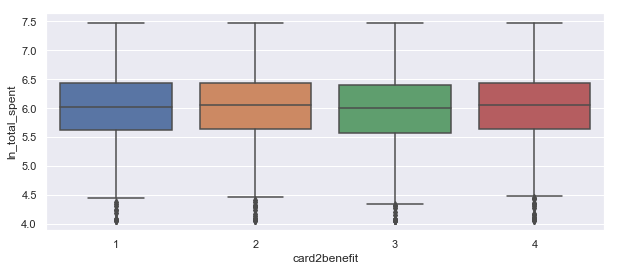

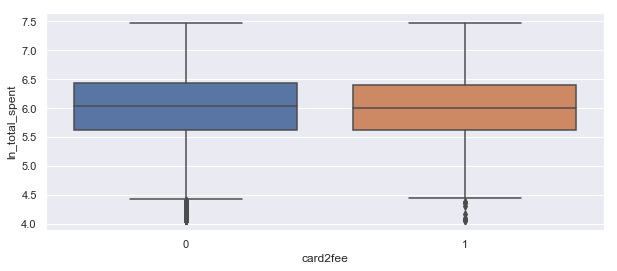

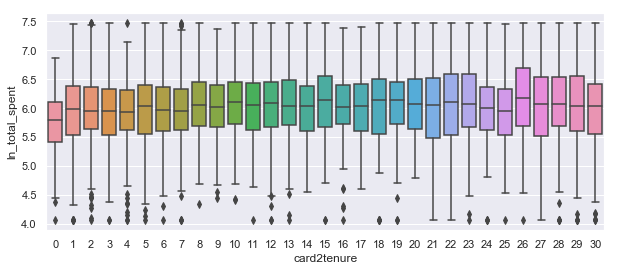

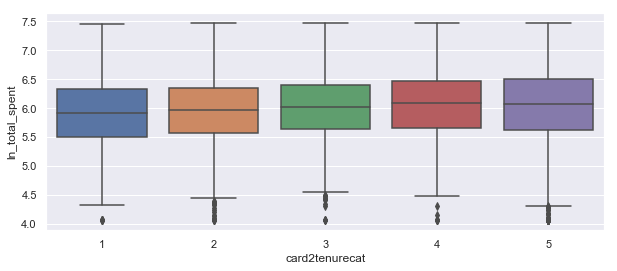

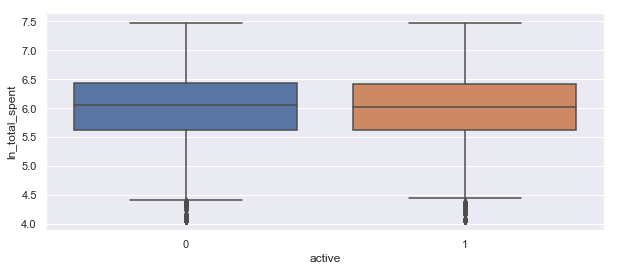

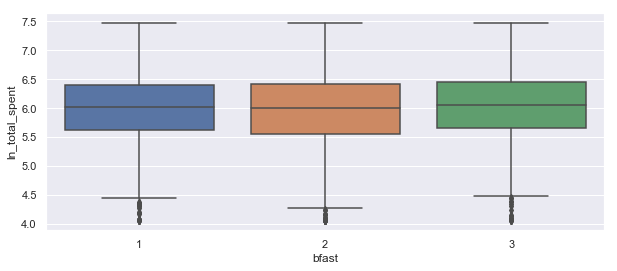

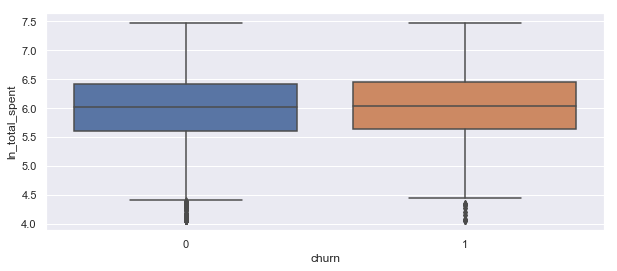

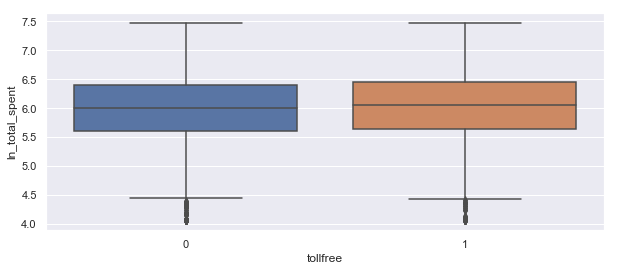

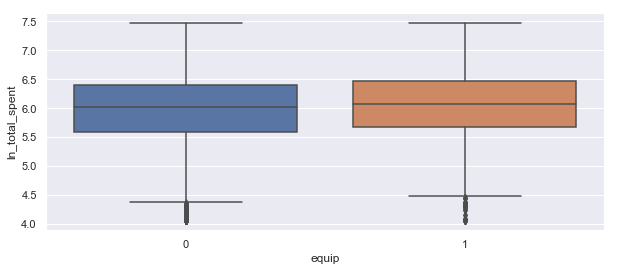

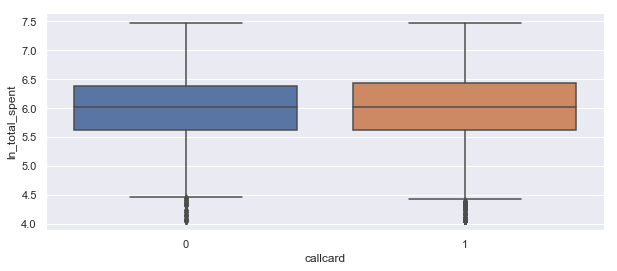

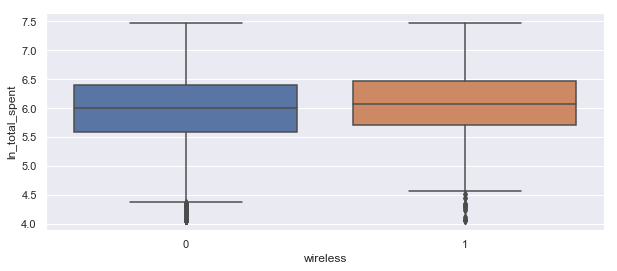

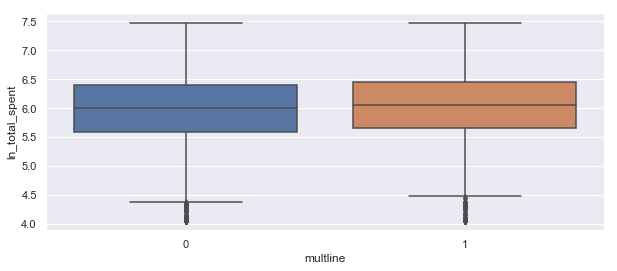

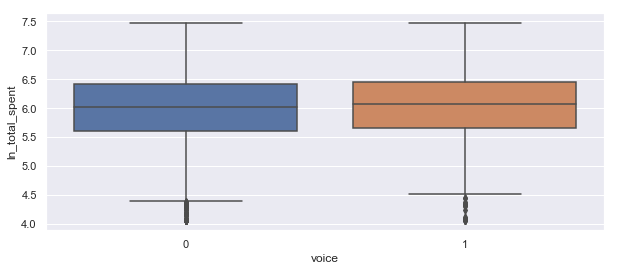

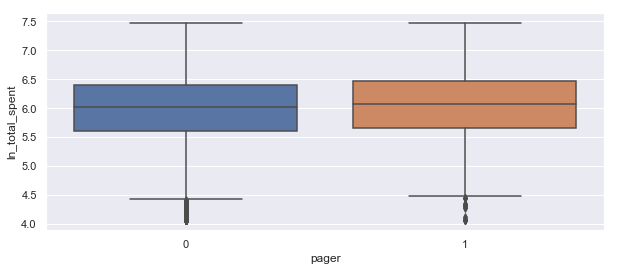

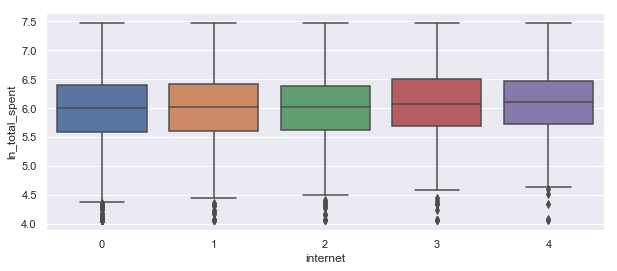

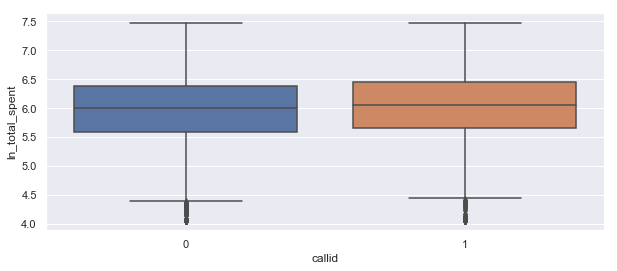

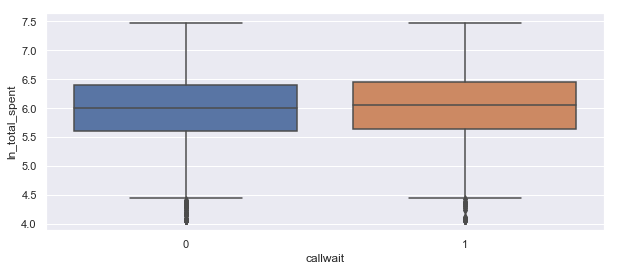

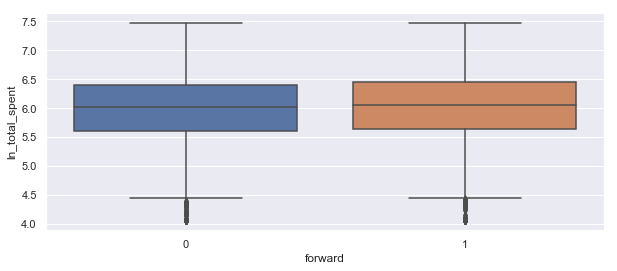

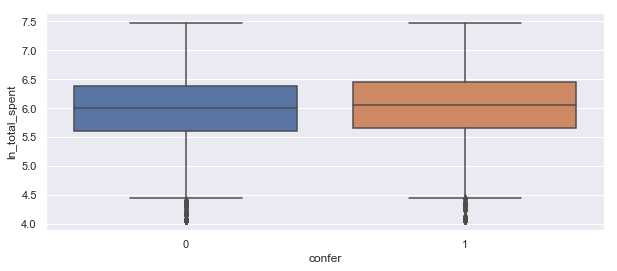

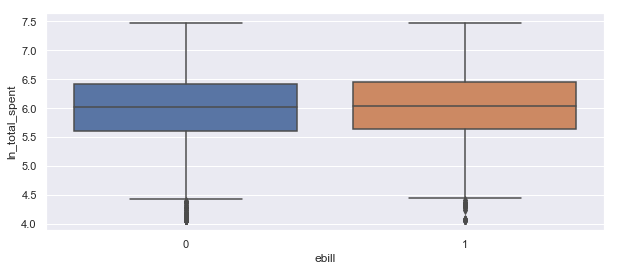

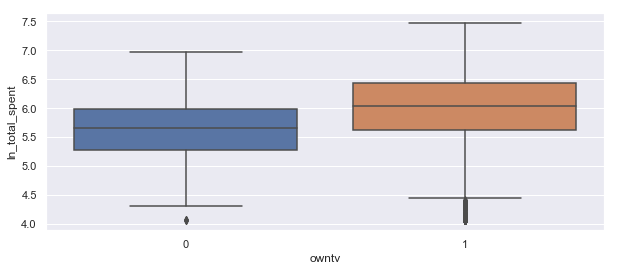

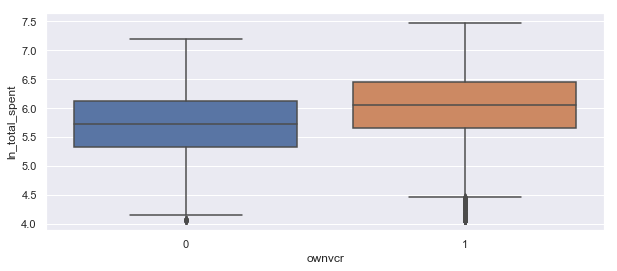

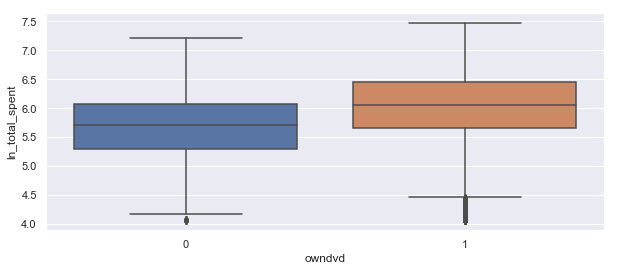

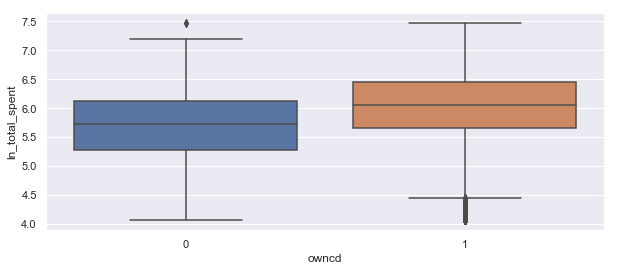

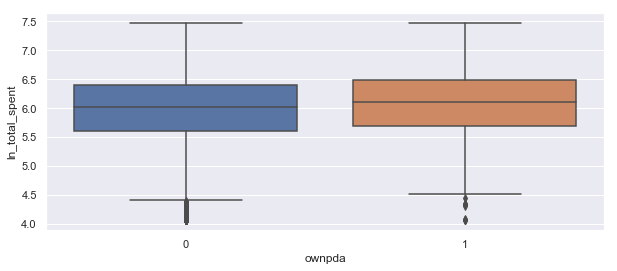

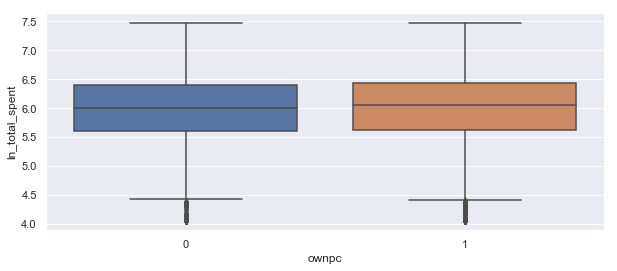

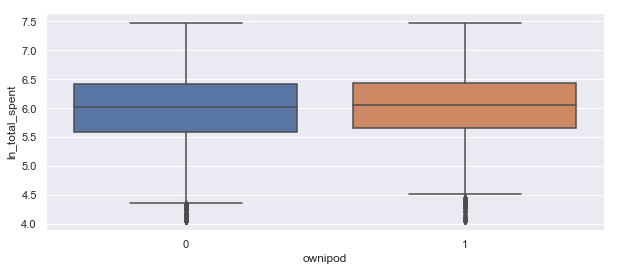

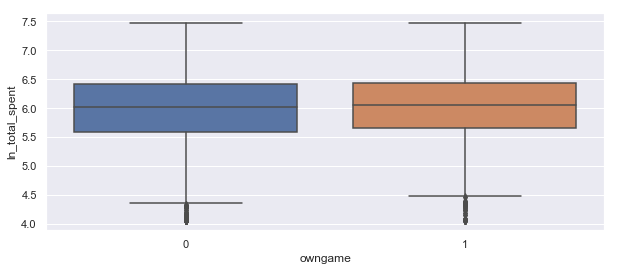

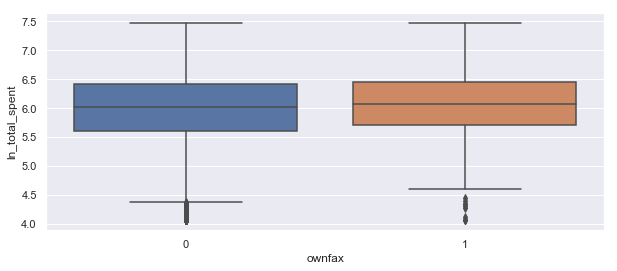

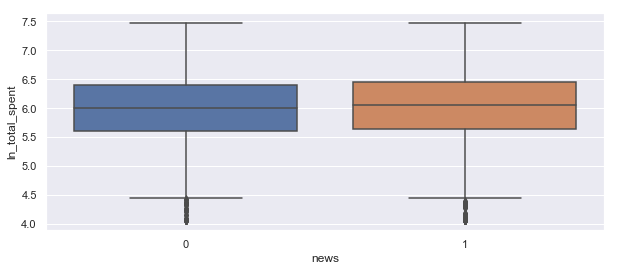

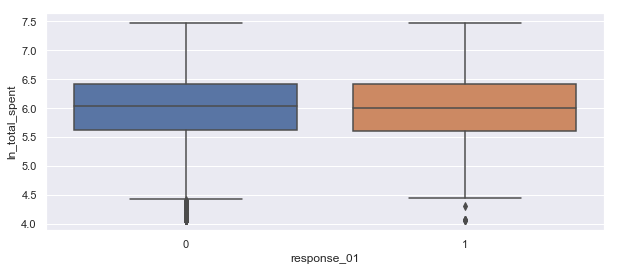

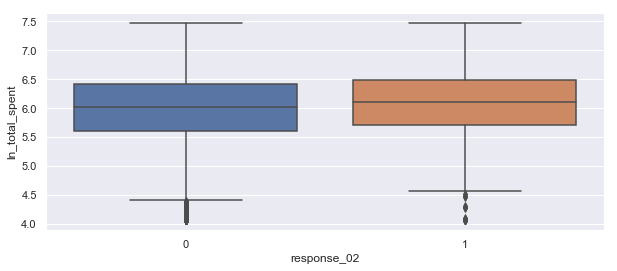

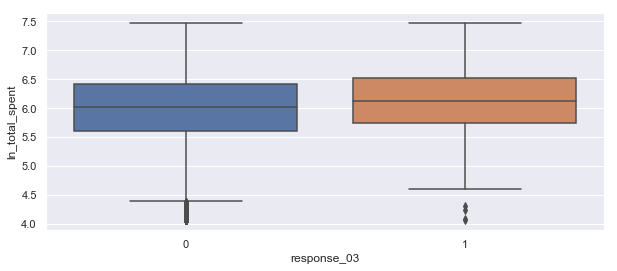

In [44]:
bp = PdfPages('Boxplot for categorical variables.pdf')

for col in cat_var:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x=col,y ='ln_total_spent',data=cust_data)
    bp.savefig(fig)
bp.close() 

## 4 Feature selection

### 4.1 Correlation continous variables

    Pearson correlation assumptions :
    - interval or ratio level
    - linearly related
    - bivariate normally distributed.

    Since variables are not normal applying spearman correlation
    

#### 4.1.1 Plotting heatmap

In [45]:
hp = PdfPages('heatmap plot for correlation.pdf')

corrs = cust_data[cont_var3].corr(method='spearman')
plt.subplots(figsize=(200,200))
sns.set(font_scale=12)
hmp = sns.heatmap(corrs,cmap='viridis', fmt=".1f",annot=True)

hp.savefig(hmp.get_figure())
hp.close() 


#### 4.1.2 Dropping independent variables which are highly correlated and less correlated to target variable among the pair

In [46]:
most_corr = {}

corrs_others = corrs[(corrs >= 0.9) | (corrs <= -0.9)] # data points with more than .9 correlation coefficient
ts_corrs = corrs['ln_total_spent'].abs().sort_values(ascending=False) # sorted coefficients of total spent 

for col in cont_var3:
    most_corr[col] = corrs_others[col][corrs_others[col].notnull()].index.tolist() # list of variables highly correlated to col variable

var_pair = []
remove_col = []
    
for (k,v) in most_corr.items():
    if set(k) == set(v): #ignore diagonal data points
        continue
    else:
        for var in v :
            if 'ln_total_spent' != k and 'ln_total_spent' not in var:
                if (var,k) not in var_pair and (k!=var) :
                    var_pair.append((k,var))# highly correlated variable pairs except target variable

print('Most correlated variable pairs and their correlation with target variable')

for item in var_pair:
    print('\n')
    print(item[0]+' : ',ts_corrs[item[0]]) #correlation of variable with target variable
    print(item[1]+' : ',ts_corrs[item[1]])
    print('\n')
    
    #Identifying variables to remove based on correlation and less correlated to target
    if ts_corrs[item[0]] not in remove_col and ts_corrs[item[1]] not in remove_col:
        if ts_corrs[item[0]] < ts_corrs[item[1]]:
            remove_col.append(item[0])
        else:
            remove_col.append(item[1]) 

Most correlated variable pairs and their correlation with target variable


('tollten : ', 0.070029775219786)
('tollmon : ', 0.06311651043787798)




('wiremon : ', 0.07185580168580345)
('wireten : ', 0.07553784534884571)




('equipten : ', 0.05820618472196739)
('equipmon : ', 0.05713058873060163)




('longmon : ', 0.051509991118807275)
('lnlongten : ', 0.06067589549643568)




('longmon : ', 0.051509991118807275)
('longten : ', 0.06067694730869136)




('longmon : ', 0.051509991118807275)
('lnlongmon : ', 0.0515966181181002)




('lnothdebt : ', 0.2717842455837827)
('othdebt : ', 0.2718542026596115)




('lncreddebt : ', 0.2457853387977177)
('creddebt : ', 0.24575123433371238)




('income : ', 0.38932342202293335)
('lninc : ', 0.3893229796320382)




('lnlongmon : ', 0.0515966181181002)
('lnlongten : ', 0.06067589549643568)




('lnlongmon : ', 0.0515966181181002)
('longten : ', 0.06067694730869136)




('longten : ', 0.06067694730869136)
('tenure : ', 0.05749571929222727)




('lo

In [47]:
set(remove_col)

{'creddebt',
 'equipmon',
 'lninc',
 'lnlongmon',
 'lnlongten',
 'lnothdebt',
 'longmon',
 'tenure',
 'tollmon',
 'wiremon'}

Among pair dropping variable which is less correlated to target variable

In [48]:
cont_var4 = list(set(cont_var3) - set(remove_col))
len(cont_var3),len(cont_var4)

(36, 26)

26 continuous variables selected after dropping one variable from each most correlated variable pairs

### 4.2 PCA continuous variables

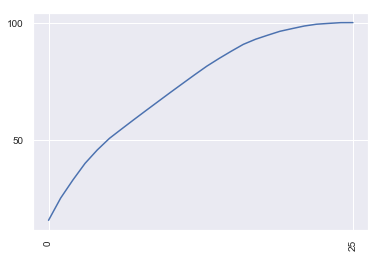

In [49]:
%matplotlib inline

df = pd.DataFrame(cust_data[cont_var4], columns=cont_var4)

# normalize data
data_scaled = pd.DataFrame(scale(df),columns = df.columns) 

# PCA
pca = PCA(n_components=len(cont_var4))
pca.fit_transform(data_scaled)


#Cumulative Variance explainss
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# Plotting cumulative variance captured by compoent
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.plots(var1)

pca_sel_df = pd.DataFrame(pca.components_,columns=data_scaled.columns,index=['PC-'+str(i) for i in range(1,len(cont_var4)+1)])

In [50]:
pca_sel_df.abs().sum(axis=0).sort_values().index

Index([u'pets', u'commutetime', u'reside', u'cardten', u'pets_reptiles',
       u'pets_freshfish', u'pets_saltfish', u'income', u'ln_total_spent',
       u'lncreddebt', u'pets_dogs', u'carvalue', u'pets_birds', u'pets_cats',
       u'othdebt', u'hourstv', u'pets_small', u'wireten', u'longten',
       u'tollten', u'cardmon', u'debtinc', u'equipten', u'spoused', u'ed',
       u'age'],
      dtype='object')

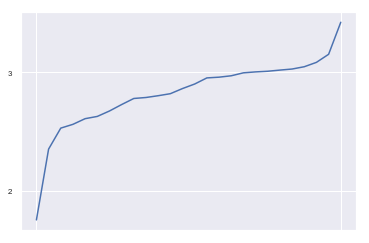

In [51]:
# plotting sum of loadings for each variable
plt.yticks(fontsize=8)
loading_sum = pd.Series(pca_sel_df.abs().sum(axis=0).sort_values())
loading_sum.plot(kind='line')

In [52]:
loading_sum[loading_sum<2.5]

pets           1.752964
commutetime    2.351630
dtype: float64

dropping columns pets,commutetime as sum of its loadings is least as compared to others

In [53]:
cont_var5 = list(set(cont_var4) - set(['pets','commutetime']))
len(cont_var5)

24

### 4.3 Kruskal wallis
    To identify significant categorical variables with respect to target variables.
    Null hypothesis: Null hypothesis assumes that the samples (groups) are from identical populations.
    
    This is alternative for one way ANOVA which assumes :
    - Response variable residuals are normally distributed (or approximately normally distributed).
    - Variances of populations are equal.
    - Responses for a given group are independent and identically distributed normal random variables 
    

In [54]:
# Identifying variables which rejects null hypothesis
significant_kruskal = []

print('Significant categorical variables based on Kruskal wallis test\n')
for col1 in cat_var:
    for col2 in ['ln_total_spent']:
        val = stats.kruskal(*[group[col2].values for name, group in cust_data.groupby(col1)])[1]
        if val < 0.05 :
            print(col1,col2,round(val,2))
            significant_kruskal.append(col1)

Significant categorical variables based on Kruskal wallis test

(u'gender', 'ln_total_spent', 0.0)
(u'agecat', 'ln_total_spent', 0.0)
(u'edcat', 'ln_total_spent', 0.0)
(u'jobcat', 'ln_total_spent', 0.0)
(u'employ', 'ln_total_spent', 0.0)
(u'empcat', 'ln_total_spent', 0.0)
(u'retire', 'ln_total_spent', 0.0)
(u'inccat', 'ln_total_spent', 0.0)
(u'jobsat', 'ln_total_spent', 0.0)
(u'spousedcat', 'ln_total_spent', 0.0)
(u'homeown', 'ln_total_spent', 0.0)
(u'hometype', 'ln_total_spent', 0.0)
(u'address', 'ln_total_spent', 0.0)
(u'addresscat', 'ln_total_spent', 0.0)
(u'carown', 'ln_total_spent', 0.0)
(u'carcatvalue', 'ln_total_spent', 0.0)
(u'commutebike', 'ln_total_spent', 0.04)
(u'reason', 'ln_total_spent', 0.0)
(u'vote', 'ln_total_spent', 0.0)
(u'card', 'ln_total_spent', 0.0)
(u'cardtenure', 'ln_total_spent', 0.01)
(u'cardtenurecat', 'ln_total_spent', 0.0)
(u'card2', 'ln_total_spent', 0.0)
(u'card2tenure', 'ln_total_spent', 0.0)
(u'card2tenurecat', 'ln_total_spent', 0.0)
(u'bfast', 'ln_tota

### 4.4 Chi square Test of independence among categorical variable

    The null hypothesis for a chi-square independence test is that two categorical variables are independent in some population
    
    Assumptions:

    - There must be different participants in each group with no participant being in more than one group.
    - Random samples from the population. In our case, the customer details is a good representation of the population.

In [55]:

def chi2(df,target,all_cat,remove_col):
    col_sel = list(set(all_cat) - set(remove_col))
    chi_sq_dep = {} # key : variable,  value : list of non independent variables

    for k in col_sel:
        chi_sq_dep[k] = []
        for v in col_sel: 
            contingency_table_employ = pd.crosstab(
                df[k],
                df[v])
            val = stats.chi2_contingency(contingency_table_employ)[1]
            if (k!=v) and (val ==0):
                chi_sq_dep[k].append(v)
        if not chi_sq_dep[k]:
            del chi_sq_dep[k]

    #sorted dictionary keys based on number of variables it is not independent
    for item in sorted(chi_sq_dep.items(), key=lambda x: len(x[1])):
        print(item)
        print('\n')

In [56]:
chi2(cust_data,'ln_total_spent',significant_kruskal,[])

(u'bfast', [u'agecat'])


(u'retire', [u'agecat'])


(u'equip', [u'internet'])


(u'carown', [u'carcatvalue'])


(u'hometype', [u'homeown'])


(u'ownpc', [u'internet'])


(u'card2', [u'card'])


(u'ownfax', [u'wireless'])


(u'jobsat', [u'empcat'])


(u'card', [u'card2'])


(u'ownpda', [u'wireless'])


(u'homeown', [u'hometype'])


(u'carcatvalue', [u'carown', u'inccat'])


(u'internet', [u'equip', u'ownpc'])


(u'pager', [u'wireless', u'voice'])


(u'voice', [u'wireless', u'pager'])


(u'inccat', [u'agecat', u'carcatvalue'])


(u'news', [u'cardtenure', u'card2tenure', u'card2tenurecat'])


(u'callid', [u'callwait', u'confer', u'forward', u'tollfree'])


(u'forward', [u'callwait', u'callid', u'confer', u'tollfree'])


(u'callwait', [u'callid', u'confer', u'forward', u'tollfree'])


(u'confer', [u'callwait', u'callid', u'forward', u'tollfree'])


(u'wireless', [u'ownfax', u'pager', u'voice', u'ownpda'])


(u'tollfree', [u'callwait', u'callid', u'confer', u'forward'])


(u'addresscat', [

In [57]:
remove_col = [u'bfast', u'retire', u'empcat', u'addresscat', u'cardtenure', u'cardtenurecat', u'address', u'card2tenure', u'inccat', u'card2tenurecat', u'employ',u'callid', u'callwait', u'confer', u'forward',u'ownfax', u'pager', u'voice', u'ownpda',u'equip', u'ownpc',u'card2',u'homeown',u'carown']
chi2(cust_data,'ln_total_spent',significant_kruskal,remove_col=remove_col)

Identified significant categorical variables based on kruskal wallis and then applied chi square to remove corresponding dependent variables 

In [58]:
cat_var2 = list(set(significant_kruskal) - set(remove_col))
len(cat_var2)

25

### 4.5 Variance Inflation Factor
    VIF can help identify multicollinearity, i.e. the case where one variable is strongly correlated with a linear combination (weighted sum) of several variables. This cannot necessarily be detected by looking at individual correlations

In [59]:
%%capture
# Returns a data frame containing variables with sorted VIF factors

def calculate_vif(df,col_drop,y):
    X = [ col for col in df.columns if col not in col_drop]
    formula = y+'~'+'+'.join(X)
    print(formula+'\n\n')
    
    # get y and X dataframes based on this regression
    y, X = dmatrices(formula, df, return_type='dataframe')
    # For each X, calculate VIF and save in dataframe
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return(vif.sort_values(by='VIF Factor',ascending=False))

In [60]:
def applyVifTillStable(df,cols,target):
    col_drop = [target]
    col_vif_drop=''
    vif_max = 11
    while vif_max > 10:
        print(col_vif_drop+' : '+str(vif_max)+'\n')
        if col_vif_drop :
            col_drop.append(col_vif_drop)
        final_vif = calculate_vif(df[cols],col_drop,target)
        final_vif.drop(index=final_vif[final_vif['features']== 'Intercept'].index,inplace=True) #Ignore intercept
        vif_max = final_vif.iloc[0,0]
        col_vif_drop = final_vif.iloc[0,1]
    print(final_vif)

In [61]:
applyVifTillStable(cust_data,cont_var5,'ln_total_spent')

 : 11

ln_total_spent~reside+pets_reptiles+pets_saltfish+cardten+ed+carvalue+tollten+pets_birds+pets_small+pets_freshfish+equipten+debtinc+spoused+pets_cats+othdebt+pets_dogs+lncreddebt+income+hourstv+longten+wireten+age+cardmon


    VIF Factor        features
4     6.745077         cardten
18    6.725633          income
15    4.536611         othdebt
23    4.225462         cardmon
12    3.642568         debtinc
6     3.387388        carvalue
17    2.665844      lncreddebt
20    2.363497         longten
21    2.098634         wireten
1     1.979381          reside
13    1.811817         spoused
11    1.701787        equipten
7     1.694972         tollten
22    1.681743             age
5     1.275099              ed
19    1.008986         hourstv
10    1.004602  pets_freshfish
8     1.004258      pets_birds
16    1.003963       pets_dogs
9     1.003000      pets_small
2     1.002375   pets_reptiles
14    1.002000       pets_cats
3     1.001785   pets_saltfish


No continuous variable has multicollinearity due to other continuous variables

In [62]:
applyVifTillStable(cust_data,cat_var2+['ln_total_spent'],'ln_total_spent')

 : 11

ln_total_spent~jobcat+edcat+owncd+response_02+vote+hometype+owntv+response_03+ownvcr+commutebike+carcatvalue+agecat+internet+wireless+jobsat+reason+spousedcat+news+card+multline+owngame+gender+owndvd+tollfree+ownipod


    VIF Factor           features
25    3.279374       agecat[T.5L]
20    3.172504  carcatvalue[T.1L]
26    3.046611       agecat[T.6L]
24    2.927529       agecat[T.4L]
21    2.728691  carcatvalue[T.2L]
8     2.536892        edcat[T.4L]
22    2.407089  carcatvalue[T.3L]
23    2.255079       agecat[T.3L]
7     2.102448        edcat[T.3L]
35    2.081963       jobsat[T.5L]
6     2.041490        edcat[T.2L]
34    2.005726       jobsat[T.4L]
33    1.929278       jobsat[T.3L]
39    1.926219       reason[T.9L]
9     1.845818        edcat[T.5L]
46    1.790929         card[T.2L]
48    1.773863         card[T.4L]
47    1.772011         card[T.3L]
32    1.770178       jobsat[T.2L]
36    1.668446       reason[T.2L]
30    1.639596     internet[T.4L]
31    1.592169     wireles

No categorical variable has multicollinearity due to multiple categorical variables

Creating dummies and checking for VIF with continuous and categorical variables

In [63]:
def create_dummies(df,col):
    df_dum = pd.get_dummies(df[col],prefix=col,drop_first=True)
    df = pd.concat([df,df_dum],axis=1)
    df.drop(columns=[col],inplace=True,axis=1)
    return(df)



In [64]:
cust_data2 = pd.DataFrame(cust_data)
cols = list(set(cont_var5)| set(cat_var2))
cust_data2.drop(columns=cust_data2.columns.difference(cols),inplace=True)
for col in  cat_var2:
    cust_data2[col] = cust_data2[col].astype('category')
    cust_data2 = create_dummies(cust_data2,col)

In [65]:
cust_data2.shape , len(cont_var5),len(cat_var2)

((4994, 79), 24, 25)

In [66]:
applyVifTillStable(cust_data2,cust_data2.columns,'ln_total_spent')

 : 11

ln_total_spent~age+ed+income+debtinc+lncreddebt+othdebt+spoused+reside+pets_cats+pets_dogs+pets_birds+pets_reptiles+pets_small+pets_saltfish+pets_freshfish+carvalue+longten+tollten+equipten+cardmon+cardten+wireten+hourstv+jobcat_2+jobcat_3+jobcat_4+jobcat_5+jobcat_6+edcat_2+edcat_3+edcat_4+edcat_5+owncd_1+response_02_1+vote_1+hometype_2+hometype_3+hometype_4+owntv_1+response_03_1+ownvcr_1+commutebike_1+carcatvalue_1+carcatvalue_2+carcatvalue_3+agecat_3+agecat_4+agecat_5+agecat_6+internet_1+internet_2+internet_3+internet_4+wireless_1+jobsat_2+jobsat_3+jobsat_4+jobsat_5+reason_2+reason_3+reason_4+reason_9+spousedcat_1+spousedcat_2+spousedcat_3+spousedcat_4+spousedcat_5+news_1+card_2+card_3+card_4+card_5+multline_1+owngame_1+gender_1+owndvd_1+tollfree_1+ownipod_1


spoused : 145.03287238199775

ln_total_spent~age+ed+income+debtinc+lncreddebt+othdebt+reside+pets_cats+pets_dogs+pets_birds+pets_reptiles+pets_small+pets_saltfish+pets_freshfish+carvalue+longten+tollten+equipten+cardmon+

dropping spoused,agecat_6,edcat_4,carvalue

In [67]:
cols_selected = 'ln_total_spent~age+ed+income+debtinc+lncreddebt+othdebt+reside+pets_cats+pets_dogs+pets_birds+pets_reptiles+pets_small+pets_saltfish+pets_freshfish+longten+tollten+equipten+cardmon+cardten+wireten+hourstv+jobcat_2+jobcat_3+jobcat_4+jobcat_5+jobcat_6+edcat_2+edcat_3+edcat_5+owncd_1+response_02_1+vote_1+hometype_2+hometype_3+hometype_4+owntv_1+response_03_1+ownvcr_1+commutebike_1+carcatvalue_1+carcatvalue_2+carcatvalue_3+agecat_3+agecat_4+agecat_5+internet_1+internet_2+internet_3+internet_4+wireless_1+jobsat_2+jobsat_3+jobsat_4+jobsat_5+reason_2+reason_3+reason_4+reason_9+spousedcat_1+spousedcat_2+spousedcat_3+spousedcat_4+spousedcat_5+news_1+card_2+card_3+card_4+card_5+multline_1+owngame_1+gender_1+owndvd_1+tollfree_1+ownipod_1'.replace('\n','').replace('~','+').split('+')
len(cols_selected),cols_selected

(75,
 ['ln_total_spent',
  'age',
  'ed',
  'income',
  'debtinc',
  'lncreddebt',
  'othdebt',
  'reside',
  'pets_cats',
  'pets_dogs',
  'pets_birds',
  'pets_reptiles',
  'pets_small',
  'pets_saltfish',
  'pets_freshfish',
  'longten',
  'tollten',
  'equipten',
  'cardmon',
  'cardten',
  'wireten',
  'hourstv',
  'jobcat_2',
  'jobcat_3',
  'jobcat_4',
  'jobcat_5',
  'jobcat_6',
  'edcat_2',
  'edcat_3',
  'edcat_5',
  'owncd_1',
  'response_02_1',
  'vote_1',
  'hometype_2',
  'hometype_3',
  'hometype_4',
  'owntv_1',
  'response_03_1',
  'ownvcr_1',
  'commutebike_1',
  'carcatvalue_1',
  'carcatvalue_2',
  'carcatvalue_3',
  'agecat_3',
  'agecat_4',
  'agecat_5',
  'internet_1',
  'internet_2',
  'internet_3',
  'internet_4',
  'wireless_1',
  'jobsat_2',
  'jobsat_3',
  'jobsat_4',
  'jobsat_5',
  'reason_2',
  'reason_3',
  'reason_4',
  'reason_9',
  'spousedcat_1',
  'spousedcat_2',
  'spousedcat_3',
  'spousedcat_4',
  'spousedcat_5',
  'news_1',
  'card_2',
  'card_3

### 4.6 Dropping insignifacnt variables based on p values of t-test in OLS
    t-test determines whether the slope of the regression line differs significantly from zero
    null hypothesis states that the slope is equal to zero, and the alternative hypothesis states that the slope is not equal to zero

In [68]:
def get_metrics(model_op,feature,y):
    y_pred = model_op.predict(test_X[feature])
    mae = metrics.mean_absolute_error(test_y, y_pred)
    mse = metrics.mean_squared_error(test_y, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(test_y, y_pred))
    mape = mean_absolute_percentage_error(test_y, y_pred)
    values2 = [mae,mse,rmse,mape,','.join(list(feature))]
    return(values2)

In [69]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [70]:
# Performing OLS and getting p values then sorting them and dropping the index having the largest value and which is more than significance level

features = get_features(df='',all_col=cols_selected,target='ln_total_spent')
train_X, test_X, train_y, test_y = train_test_split( cust_data2[features],
                                                  cust_data2['ln_total_spent'],
                                                  test_size = 0.3,
                                                  random_state = 50 )

data = pd.concat([train_X,train_y],axis=1).astype(float)
y = 'ln_total_spent'
col_drop = [y]
col_ols_p_drop = ''
p_max = 0.06

while p_max > 0.05 :
    print(col_ols_p_drop+' : '+str(p_max)+'\n')
    if col_ols_p_drop:
        col_drop = col_drop + [col_ols_p_drop]
        
    sel_col = data.columns.difference(col_drop)
    formula = y+'~'+'+'.join(sel_col)
    print(formula+'\n\n')
    model = smf.ols(data=data,formula=formula).fit()
    p_max = model.pvalues.sort_values(ascending=False).drop(index='Intercept')[0]
    col_ols_p_drop = model.pvalues.sort_values(ascending=False).drop(index='Intercept').index[0]
    


print(model.summary())
values = get_metrics(model,sel_col,'ln_total_spent')
print(('MAE ',values[0]))
print(('MSE ',values[1]))
print(('RMSE ',values[2]))
print(('MAPE ',str(values[3])+' %'))


 : 0.06

ln_total_spent~age+agecat_3+agecat_4+agecat_5+carcatvalue_1+carcatvalue_2+carcatvalue_3+card_2+card_3+card_4+card_5+cardmon+cardten+commutebike_1+debtinc+ed+edcat_2+edcat_3+edcat_5+equipten+gender_1+hometype_2+hometype_3+hometype_4+hourstv+income+internet_1+internet_2+internet_3+internet_4+jobcat_2+jobcat_3+jobcat_4+jobcat_5+jobcat_6+jobsat_2+jobsat_3+jobsat_4+jobsat_5+lncreddebt+longten+multline_1+news_1+othdebt+owncd_1+owndvd_1+owngame_1+ownipod_1+owntv_1+ownvcr_1+pets_birds+pets_cats+pets_dogs+pets_freshfish+pets_reptiles+pets_saltfish+pets_small+reason_2+reason_3+reason_4+reason_9+reside+response_02_1+response_03_1+spousedcat_1+spousedcat_2+spousedcat_3+spousedcat_4+spousedcat_5+tollfree_1+tollten+vote_1+wireless_1+wireten


spousedcat_3 : 0.9989875655604763

ln_total_spent~age+agecat_3+agecat_4+agecat_5+carcatvalue_1+carcatvalue_2+carcatvalue_3+card_2+card_3+card_4+card_5+cardmon+cardten+commutebike_1+debtinc+ed+edcat_2+edcat_3+edcat_5+equipten+gender_1+hometype_2+hometyp

news_1 : 0.7804661695372788

ln_total_spent~age+agecat_3+agecat_4+agecat_5+carcatvalue_1+carcatvalue_2+card_2+card_3+card_4+card_5+cardmon+commutebike_1+debtinc+ed+edcat_2+edcat_5+equipten+gender_1+hometype_3+hometype_4+hourstv+income+internet_1+internet_2+internet_3+internet_4+jobcat_2+jobcat_3+jobcat_4+jobcat_5+jobcat_6+jobsat_3+jobsat_4+jobsat_5+lncreddebt+longten+multline_1+othdebt+owncd_1+owndvd_1+owngame_1+ownipod_1+owntv_1+ownvcr_1+pets_birds+pets_dogs+pets_freshfish+pets_reptiles+pets_saltfish+pets_small+reason_2+reason_4+reason_9+reside+response_03_1+spousedcat_1+spousedcat_2+spousedcat_4+tollfree_1+wireless_1+wireten


jobcat_3 : 0.7609639133855282

ln_total_spent~age+agecat_3+agecat_4+agecat_5+carcatvalue_1+carcatvalue_2+card_2+card_3+card_4+card_5+cardmon+commutebike_1+debtinc+ed+edcat_2+edcat_5+equipten+gender_1+hometype_3+hometype_4+hourstv+income+internet_1+internet_2+internet_3+internet_4+jobcat_2+jobcat_4+jobcat_5+jobcat_6+jobsat_3+jobsat_4+jobsat_5+lncreddebt+longten+

jobcat_2 : 0.5308213121923682

ln_total_spent~age+agecat_3+agecat_4+carcatvalue_1+carcatvalue_2+card_2+card_3+card_4+card_5+cardmon+commutebike_1+debtinc+edcat_2+edcat_5+equipten+gender_1+hometype_3+hourstv+income+internet_1+internet_2+internet_3+internet_4+jobcat_4+jobcat_5+jobcat_6+jobsat_3+lncreddebt+longten+multline_1+othdebt+owncd_1+owndvd_1+ownvcr_1+pets_birds+pets_freshfish+pets_reptiles+pets_saltfish+reason_2+reason_4+reason_9+response_03_1+spousedcat_2+spousedcat_4+wireless_1


hourstv : 0.5302972031088025

ln_total_spent~age+agecat_3+agecat_4+carcatvalue_1+carcatvalue_2+card_2+card_3+card_4+card_5+cardmon+commutebike_1+debtinc+edcat_2+edcat_5+equipten+gender_1+hometype_3+income+internet_1+internet_2+internet_3+internet_4+jobcat_4+jobcat_5+jobcat_6+jobsat_3+lncreddebt+longten+multline_1+othdebt+owncd_1+owndvd_1+ownvcr_1+pets_birds+pets_freshfish+pets_reptiles+pets_saltfish+reason_2+reason_4+reason_9+response_03_1+spousedcat_2+spousedcat_4+wireless_1


wireless_1 : 0.5010905190

internet_2 : 0.1264846272519533

ln_total_spent~age+carcatvalue_1+card_2+card_3+card_4+card_5+debtinc+gender_1+income+internet_1+jobcat_4+jobcat_6+lncreddebt+owncd_1+owndvd_1+ownvcr_1+reason_2+reason_9+spousedcat_2


jobcat_6 : 0.08485647156564231

ln_total_spent~age+carcatvalue_1+card_2+card_3+card_4+card_5+debtinc+gender_1+income+internet_1+jobcat_4+lncreddebt+owncd_1+owndvd_1+ownvcr_1+reason_2+reason_9+spousedcat_2


spousedcat_2 : 0.08065607792049548

ln_total_spent~age+carcatvalue_1+card_2+card_3+card_4+card_5+debtinc+gender_1+income+internet_1+jobcat_4+lncreddebt+owncd_1+owndvd_1+ownvcr_1+reason_2+reason_9


internet_1 : 0.05594610553522019

ln_total_spent~age+carcatvalue_1+card_2+card_3+card_4+card_5+debtinc+gender_1+income+jobcat_4+lncreddebt+owncd_1+owndvd_1+ownvcr_1+reason_2+reason_9


                            OLS Regression Results                            
Dep. Variable:         ln_total_spent   R-squared:                       0.280
Model:                            O

In [71]:
def identify_var(remove_col,all_col):    
    all_var2 = list(set(all_col) - set(remove_col))
    cat_selected = []
    cont_selected = []
    for col in all_var2:
        if col in cont_var:
            cont_selected.append(col)
        elif '_' in col and cat_var.eq(col).any():
            cat_selected.append(col)
        elif '_' in col and  cat_var.eq(col.rsplit('_',1)[0]).any():
            if col.rsplit('_',1)[0] not in cat_selected:
                cat_selected.append(col.rsplit('_',1)[0])
        else:
            print('Failed to identiy variable type',col)
            
    print('\n'+'*'*80+'\n')
    print('All var :'+str(len(all_var2)))
    print('Cat var :'+str(len(cat_selected)))
    print('Cont var '+str(len(cont_selected))+'\n')
    return(cat_selected,cont_selected)

In [72]:
#Variables selected after dropping variables based on p value
cols_selected_p = 'age+carcatvalue_1+card_2+card_3+card_4+card_5+debtinc+gender_1+income+jobcat_4+lncreddebt+owncd_1+owndvd_1+ownvcr_1+reason_2+reason_9'.split('+')
remove_col = set(cols_selected) - set(cols_selected_p)
identify_var(remove_col,cols_selected)



********************************************************************************

All var :16
Cat var :8
Cont var 4



(['card',
  'jobcat',
  'gender',
  'carcatvalue',
  'reason',
  'owndvd',
  'ownvcr',
  'owncd'],
 ['age', 'lncreddebt', 'debtinc', 'income'])

## 5 Model Building

    Applying 
    - Linear Regression
    - Ridge
    - Lasso
    - Randomized lasso
    - Recursive Feature Elimination
    - Random Forest
    - F regression
    
    To get the driving factors

### 5.1 Calculating coefficients from different models

In [73]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

np.random.seed(50)
ranks={}
names = cols_selected_p

 
X, test_X, Y, test_y = train_test_split( cust_data2[names],
                                                  cust_data2['ln_total_spent'],
                                                  test_size = 0.3,
                                                  random_state = 50 )
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))
 
lr = LinearRegression(normalize=True)
lr.fit(X, Y)
ranks["LinearRegression"] = rank_to_dict(np.abs(lr.coef_), names)
 
ridge = Ridge(alpha=7)
ridge.fit(X, Y)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)
 
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)
 
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["RandomizedLasso"] = rank_to_dict(np.abs(rlasso.scores_), names)
 
rfe = RFE(lr, n_features_to_select=20)
rfe.fit(X,Y)
ranks["RFE"] = rank_to_dict(map(float, rfe.ranking_), names, order=-1)
 
rf = RandomForestRegressor()
rf.fit(X,Y)
ranks["RandomForest"] = rank_to_dict(rf.feature_importances_, names)
 
f, pval  = f_regression(X, Y, center=True)
ranks["F_Regression"] = rank_to_dict(f, names)
 
r = {}
for name in names:
    r[name] = round(np.mean([ranks[method][name] for method in ranks.keys()]), 2)

methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
ranks_df = pd.DataFrame(data=ranks).sort_values(by='Mean',ascending=False)
ranks_df

C:\Users\Shriya\Software\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


F_Regression  Lasso  LinearRegression  Mean  RFE  RandomForest  \
income                 1.00   1.00              0.00  0.43  0.0          1.00   
card_3                 0.12   0.00              1.00  0.31  0.0          0.08   
card_2                 0.11   0.00              0.95  0.30  0.0          0.08   
card_4                 0.02   0.00              0.98  0.29  0.0          0.08   
reason_2               0.16   0.00              0.80  0.26  0.0          0.06   
card_5                 0.01   0.00              0.81  0.23  0.0          0.03   
lncreddebt             0.47   0.00              0.07  0.17  0.0          0.58   
carcatvalue_1          0.66   0.00              0.21  0.16  0.0          0.03   
age                    0.00   0.43              0.00  0.13  0.0          0.48   
debtinc                0.00   0.00              0.00  0.08  0.0          0.56   
owncd_1                0.19   0.00              0.17  0.08  0.0          0.01   
owndvd_1               0.20   0.00              0.17  0.08  0.0          0.00   
ownvcr_1               0.19   0.00              0.15  0.07  0.0          0.00   
reason_9               0.00   0.00              0.25  0.07  0.0          0.03   
gender_1               0.05   0.00              0.13  0.06  0.0          0.07   
jobcat_4               0.01   0.00              0.21  0.06  0.0          0.01   

               RandomizedLasso  Ridge  
income                     0.0   0.00  
card_3                     0.0   1.00  
card_2                     0.0   0.95  
card_4                     0.0   0.98  
reason_2                   0.0   0.81  
card_5                     0.0   0.78  
lncreddebt                 0.0   0.08  
carcatvalue_1              0.0   0.22  
age                        0.0   0.00  
debtinc                    0.0   0.00  
owncd_1                    0.0   0.18  
owndvd_1                   0.0   0.18  
ownvcr_1                   0.0   0.16  
reason_9                   0.0   0.24  
gender_1                   0.0   0.14  
jobcat_4                   0.0   0.21

In [74]:
cols_selected_rank = [col for col in ranks_df.index]

C:\Users\Shriya\Software\Anaconda2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Shriya\Software\Anaconda2\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


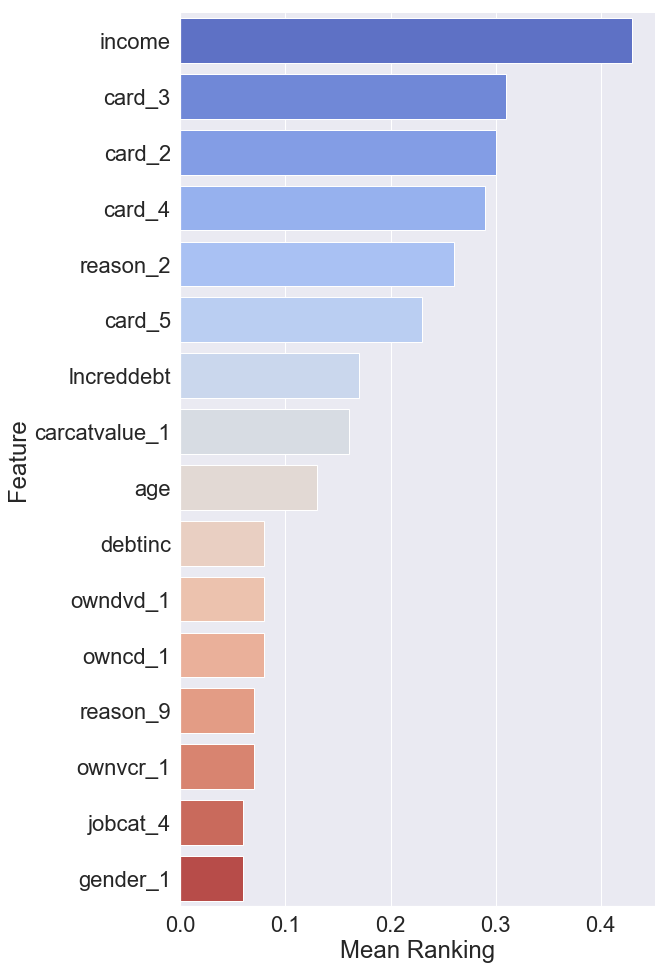

In [75]:
#Plotting mean of coefficients calculated from different models for each variable
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])
sns.set(font_scale=2)
plt.figure(figsize=(3,10))
# ax = plt.subplot(111)
# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=14, aspect=.7, palette='coolwarm')

### 5.2 Dropping variables and calculating R2, Adj R2 ,MAE, MSE, RMSE,MAPE for different models

In [76]:
# Performing split, Creating OLS model, Calculating R2, Adj R2 ,MAE, MSE, RMSE,MAPE and dropping variables based on that

def split_stats_drop(df,target,features,remove_col):
    cols = ['R2','AdjR2','F_sign','MAE','MSE','RMSE','MAPE','Feature_selected','feature_drop']
    train_X, test_X, train_y, test_y = train_test_split( df[features],
                                                  df[target],
                                                  test_size = 0.3,
                                                  random_state = 50 )
    
    data = pd.concat([train_X,train_y],axis=1).astype(float)
    y = target
    output_stats = pd.DataFrame(columns=cols)
    col_drop1 = list(set(remove_col) | set([target]))
    
    print('Data shape : ',data.shape)
    
    formula = y+'~'+'+'.join(list(set(features)- set(col_drop1)))
    model = smf.ols(data=data,formula=formula).fit()
    values1=[model.rsquared,model.rsquared_adj,model.f_pvalue]

    y_pred = model.predict(test_X[list(set(features)- set(col_drop1))])
    values2 = [metrics.mean_absolute_error(test_y, y_pred),metrics.mean_squared_error(test_y, y_pred),np.sqrt(metrics.mean_squared_error(test_y, y_pred)),mean_absolute_percentage_error(test_y, y_pred),','.join(list(set(features)- set(col_drop1)))]
    values=[]
    values.extend(values1)
    values.extend(values2)
    values.append(','.join(remove_col))
    print('\n'+'*'*80+'\n')
    print(np.round(pd.DataFrame(data=[values],columns=cols),2))
    print('\n'+'*'*80+'\n')
    

    old_r2 = 0 ; old_adjr2 = 0; old_f_sign = 1; old_mae = 100 ; old_mse = 100; old_rmse = 100 ; old_mape = 100 
    old_sel = ''; old_drop_cols = ''
    
    for col in [col2 for col2 in features if col2 not in col_drop1]:
        values = []
        col_drop = col_drop1 + [col]
        feature = df[features].columns.difference(col_drop)
        
        formula = y+'~'+'+'.join(feature)
        model = smf.ols(data=data,formula=formula).fit()
        values1=[model.rsquared,model.rsquared_adj,model.f_pvalue]
        
        y_pred = model.predict(test_X[feature])
        values2 = [metrics.mean_absolute_error(test_y, y_pred),metrics.mean_squared_error(test_y, y_pred),np.sqrt(metrics.mean_squared_error(test_y, y_pred)),mean_absolute_percentage_error(test_y, y_pred),','.join(list(feature))]
        values.extend(values1)
        values.extend(values2)
        values.append(','.join(col_drop))
        
        output = pd.DataFrame(data=[values],columns=cols)
        output_stats = output_stats.append(output,ignore_index=True)
        
        output_stats = np.round(output_stats,2).sort_values(by=['AdjR2','RMSE','MAPE','MSE','MAE'],ascending=[False,True,True,True,True])
        new_r2 , new_adjr2 , new_f_sign , new_mae , new_mse, new_rmse, new_mape,new_sel,new_drop_cols  = output_stats.loc[0]
        
        if new_adjr2 >= old_adjr2 and new_f_sign <= old_f_sign and new_mae <= old_mae and new_mse <= old_mse and new_rmse <= old_rmse and new_mape <=old_mape  and old_drop_cols != new_drop_cols :
            col_drop_stats = list(set(new_drop_cols.split(',')) - set(col_drop1))[0]
            remove_col.append(col_drop_stats)
            col_drop1 = [target]+remove_col
            print('Dropped : '+col_drop_stats)
            old_r2 , old_adjr2 , old_f_sign , old_mae , old_mse, old_rmse, old_mape,old_sel,old_drop_cols =  new_r2,\
            new_adjr2 , new_f_sign , new_mae , new_mse, new_rmse, new_mape,new_sel, new_drop_cols
        else:
            break
        output_stats = pd.DataFrame(columns=cols)
    print('\n'+'*'*80+'\n')
    print(output_stats)
    cat_selected,cont_selected = identify_var(remove_col,features)
    
    return(remove_col,cat_selected,cont_selected)


In [77]:
final_cols = {}

#### 5.2.1 F Regression
    Based on F statistic

In [78]:
print(ranks_df.columns[0]+'\n'+'*'*20+'\n')
cols_selected_temp = [col for col in ranks_df.sort_values(by=ranks_df.columns[0]).index]
remove_col1 = 'age,debtinc'.split(',')
remove_col1,cat_selected,cont_selected = split_stats_drop(cust_data2,'ln_total_spent',cols_selected_temp,remove_col=remove_col1)
final_cols[ranks_df.columns[0]] = remove_col1
cat_selected,cont_selected

F_Regression
********************

('Data shape : ', (3495, 17))

********************************************************************************

     R2  AdjR2  F_sign   MAE  MSE  RMSE  MAPE  \
0  0.28   0.27     0.0  0.43  0.3  0.55   7.5   

                                                                                                            Feature_selected  \
0  card_5,card_4,jobcat_4,card_3,lncreddebt,card_2,gender_1,carcatvalue_1,reason_2,income,reason_9,owndvd_1,ownvcr_1,owncd_1   

  feature_drop  
0  age,debtinc  

********************************************************************************

Dropped : reason_9

********************************************************************************

     R2  AdjR2  F_sign   MAE   MSE  RMSE  MAPE  \
0  0.25   0.25     0.0  0.44  0.31  0.56  7.58   

                                                                                            Feature_selected  \
0  carcatvalue_1,card_2,card_3,card_4,gender_1,income,jobcat_4,l

(['card',
  'jobcat',
  'gender',
  'carcatvalue',
  'reason',
  'owndvd',
  'ownvcr',
  'owncd'],
 ['lncreddebt', 'income'])

#### 5.2.2 Linear regression
    computes a least-squares regression

In [79]:
print(ranks_df.columns[2]+'\n'+'*'*20+'\n')
cols_selected_temp = [col for col in ranks_df.sort_values(by=ranks_df.columns[2]).index]
remove_col1 = []
remove_col1,cat_selected,cont_selected = split_stats_drop(cust_data2,'ln_total_spent',cols_selected_temp,remove_col=remove_col1)
final_cols[ranks_df.columns[2]] = remove_col1
cat_selected,cont_selected

LinearRegression
********************

('Data shape : ', (3495, 17))

********************************************************************************

     R2  AdjR2  F_sign   MAE  MSE  RMSE  MAPE  \
0  0.28   0.28     0.0  0.43  0.3  0.55  7.48   

                                                                                                                        Feature_selected  \
0  card_5,card_4,jobcat_4,card_3,lncreddebt,age,card_2,gender_1,carcatvalue_1,debtinc,reason_2,income,reason_9,owndvd_1,ownvcr_1,owncd_1   

  feature_drop  
0               

********************************************************************************

Dropped : income

********************************************************************************

     R2  AdjR2  F_sign   MAE   MSE  RMSE  MAPE  \
0  0.25   0.25     0.0  0.44  0.32  0.56  7.65   

                                                                                                             Feature_selected  \
0  carcatvalue_1,card

(['card',
  'jobcat',
  'gender',
  'carcatvalue',
  'reason',
  'owndvd',
  'ownvcr',
  'owncd'],
 ['lncreddebt', 'age', 'debtinc'])

#### 5.2.3 Dropping one variable at time based on least mean of coefficients obtained from different models

In [80]:
print(ranks_df.columns[3]+'\n'+'*'*20+'\n')
cols_selected_temp = [col for col in ranks_df.sort_values(by=ranks_df.columns[3]).index]
remove_col1 = []
remove_col1,cat_selected,cont_selected = split_stats_drop(cust_data2,'ln_total_spent',cols_selected_temp,remove_col=remove_col1)
final_cols[ranks_df.columns[3]] = remove_col1
cat_selected,cont_selected

Mean
********************

('Data shape : ', (3495, 17))

********************************************************************************

     R2  AdjR2  F_sign   MAE  MSE  RMSE  MAPE  \
0  0.28   0.28     0.0  0.43  0.3  0.55  7.48   

                                                                                                                        Feature_selected  \
0  card_5,card_4,jobcat_4,card_3,lncreddebt,age,card_2,gender_1,carcatvalue_1,debtinc,reason_2,income,reason_9,owndvd_1,ownvcr_1,owncd_1   

  feature_drop  
0               

********************************************************************************

Dropped : gender_1
Dropped : jobcat_4
Dropped : ownvcr_1
Dropped : reason_9

********************************************************************************

     R2  AdjR2  F_sign   MAE  MSE  RMSE  MAPE  \
0  0.27   0.27     0.0  0.43  0.3  0.55  7.49   

                                                                            Feature_selected  \
0  age,ca

(['card', 'carcatvalue', 'reason', 'owndvd', 'owncd'],
 ['age', 'lncreddebt', 'debtinc', 'income'])

#### 5.2.4 Recursive Feature Elimination
    Selects features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features. Then, the least important features are pruned from current set of features. 

In [81]:
print(ranks_df.columns[4]+'\n'+'*'*20+'\n')
cols_selected_temp = [col for col in ranks_df.sort_values(by=ranks_df.columns[4]).index]
remove_col1 = []
remove_col1,cat_selected,cont_selected = split_stats_drop(cust_data2,'ln_total_spent',cols_selected_temp,remove_col=remove_col1)
final_cols[ranks_df.columns[4]] = remove_col1
cat_selected,cont_selected

RFE
********************

('Data shape : ', (3495, 17))

********************************************************************************

     R2  AdjR2  F_sign   MAE  MSE  RMSE  MAPE  \
0  0.28   0.28     0.0  0.43  0.3  0.55  7.48   

                                                                                                                        Feature_selected  \
0  card_5,card_4,jobcat_4,card_3,card_2,age,lncreddebt,gender_1,carcatvalue_1,debtinc,reason_2,income,reason_9,owndvd_1,ownvcr_1,owncd_1   

  feature_drop  
0               

********************************************************************************

Dropped : income

********************************************************************************

     R2  AdjR2  F_sign   MAE   MSE  RMSE  MAPE  \
0  0.18   0.18     0.0  0.46  0.34  0.58  7.95   

                                                                                                          Feature_selected  \
0  age,carcatvalue_1,card_2,card_4,ca

(['card',
  'jobcat',
  'gender',
  'carcatvalue',
  'reason',
  'owndvd',
  'ownvcr',
  'owncd'],
 ['age', 'lncreddebt', 'debtinc'])

#### 5.2.5 Random Forest
    A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [82]:
print(ranks_df.columns[5]+'\n'+'*'*20+'\n')
cols_selected_temp = [col for col in ranks_df.sort_values(by=ranks_df.columns[5]).index]
remove_col1 = 'owndvd_1,ownvcr_1'.split(',')
remove_col1,cat_selected,cont_selected = split_stats_drop(cust_data2,'ln_total_spent',cols_selected_temp,remove_col=remove_col1)
final_cols[ranks_df.columns[5]] = remove_col1
cat_selected,cont_selected

RandomForest
********************

('Data shape : ', (3495, 17))

********************************************************************************

     R2  AdjR2  F_sign   MAE  MSE  RMSE  MAPE  \
0  0.28   0.27     0.0  0.43  0.3  0.55  7.49   

                                                                                                      Feature_selected  \
0  card_5,card_4,jobcat_4,card_3,card_2,age,lncreddebt,gender_1,carcatvalue_1,debtinc,reason_2,income,reason_9,owncd_1   

        feature_drop  
0  owndvd_1,ownvcr_1  

********************************************************************************

Dropped : owncd_1
Dropped : jobcat_4

********************************************************************************

     R2  AdjR2  F_sign   MAE   MSE  RMSE  MAPE  \
0  0.26   0.25     0.0  0.44  0.31  0.56  7.55   

                                                                              Feature_selected  \
0  age,carcatvalue_1,card_2,card_3,card_4,debtinc,gender_1,i

(['card', 'gender', 'carcatvalue', 'reason'],
 ['lncreddebt', 'age', 'debtinc', 'income'])

#### 5.2.6 Randomized lasso
    Randomized Lasso works by subsampling the training data and computing a Lasso estimate where the penalty of a random subset of coefficients has been scaled. By performing this double randomization several times, the method assigns high scores to features that are repeatedly selected across randomizations. 

In [83]:
print(ranks_df.columns[6]+'\n'+'*'*20+'\n')
cols_selected_temp = [col for col in ranks_df.sort_values(by=ranks_df.columns[6]).index]
remove_col1 = []
remove_col1,cat_selected,cont_selected = split_stats_drop(cust_data2,'ln_total_spent',cols_selected_temp,remove_col=remove_col1)
final_cols[ranks_df.columns[6]] = remove_col1
cat_selected,cont_selected

RandomizedLasso
********************

('Data shape : ', (3495, 17))

********************************************************************************

     R2  AdjR2  F_sign   MAE  MSE  RMSE  MAPE  \
0  0.28   0.28     0.0  0.43  0.3  0.55  7.48   

                                                                                                                        Feature_selected  \
0  card_5,card_4,jobcat_4,card_3,card_2,age,lncreddebt,gender_1,carcatvalue_1,debtinc,reason_2,income,reason_9,owndvd_1,ownvcr_1,owncd_1   

  feature_drop  
0               

********************************************************************************

Dropped : income

********************************************************************************

     R2  AdjR2  F_sign   MAE   MSE  RMSE  MAPE  \
0  0.18   0.18     0.0  0.46  0.34  0.58  7.95   

                                                                                                          Feature_selected  \
0  age,carcatvalue_1,card

(['card',
  'jobcat',
  'gender',
  'carcatvalue',
  'reason',
  'owndvd',
  'ownvcr',
  'owncd'],
 ['age', 'lncreddebt', 'debtinc'])

#### 5.2.7 Ridge
    As ridge regression shrinks the coefficients towards zero, it introduces some bias. But it can reduce the variance to a great extent which will result in a better mean-squared error. The amount of shrinkage is controlled by λ which multiplies the ridge penalty

In [84]:
print(ranks_df.columns[7]+'\n'+'*'*20+'\n')
cols_selected_temp = [col for col in ranks_df.sort_values(by=ranks_df.columns[7]).index]
remove_col1 = []
remove_col1,cat_selected,cont_selected = split_stats_drop(cust_data2,'ln_total_spent',cols_selected_temp,remove_col=remove_col1)
final_cols[ranks_df.columns[7]] = remove_col1
cat_selected,cont_selected

Ridge
********************

('Data shape : ', (3495, 17))

********************************************************************************

     R2  AdjR2  F_sign   MAE  MSE  RMSE  MAPE  \
0  0.28   0.28     0.0  0.43  0.3  0.55  7.48   

                                                                                                                        Feature_selected  \
0  card_5,card_4,jobcat_4,card_3,lncreddebt,age,card_2,gender_1,carcatvalue_1,debtinc,reason_2,income,reason_9,owndvd_1,ownvcr_1,owncd_1   

  feature_drop  
0               

********************************************************************************

Dropped : income

********************************************************************************

     R2  AdjR2  F_sign   MAE   MSE  RMSE  MAPE  \
0  0.25   0.25     0.0  0.44  0.32  0.56  7.65   

                                                                                                             Feature_selected  \
0  carcatvalue_1,card_2,card_3,c

(['card',
  'jobcat',
  'gender',
  'carcatvalue',
  'reason',
  'owndvd',
  'ownvcr',
  'owncd'],
 ['lncreddebt', 'age', 'debtinc'])

Finally obtained variables from different regression 

In [85]:
pd.Series(final_cols)

F_Regression                        [age, debtinc, reason_9]
LinearRegression                                    [income]
Mean                [gender_1, jobcat_4, ownvcr_1, reason_9]
RFE                                                 [income]
RandomForest         [owndvd_1, ownvcr_1, owncd_1, jobcat_4]
RandomizedLasso                                     [income]
Ridge                                               [income]
dtype: object

Taking mean of of the coefficient obtained from different regression and droping them in increasing order has given the highest Adjusted R squere and least error

In [86]:
cols_selected_final = list(set(ranks_df.index) - set(final_cols['Mean']))
identify_var(final_cols['Mean'],ranks_df.index)


********************************************************************************

All var :12
Cat var :5
Cont var 4



(['card', 'carcatvalue', 'reason', 'owndvd', 'owncd'],
 ['lncreddebt', 'age', 'debtinc', 'income'])

In [87]:
cols_selected_final

['card_5',
 'card_4',
 'card_3',
 'lncreddebt',
 'age',
 'card_2',
 'carcatvalue_1',
 'debtinc',
 'reason_2',
 'income',
 'owndvd_1',
 'owncd_1']

Summary of obtained model with dummy variables

In [88]:
features = cols_selected_final

df = cust_data2
y = 'ln_total_spent'

train_X, test_X, train_y, test_y = train_test_split( df[features],
                                              df[y],
                                              test_size = 0.3,
                                              random_state = 50 )

data = pd.concat([train_X,train_y],axis=1).astype(float)
print('Data shape : ',data.shape)

formula = y+'~'+'+'.join(features)
model = smf.ols(data=data,formula=formula).fit()
print(model.summary())
y_pred = model.predict(test_X[features])
print('\n')
print(formula)
print('\n')
print('R squared : ',model.rsquared)
print('Adjusted R squared : ',model.rsquared_adj)
print('F statistic p value',model.f_pvalue)
print('MAE : ',metrics.mean_absolute_error(test_y, y_pred))
print('MSE : ',metrics.mean_squared_error(test_y, y_pred))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
print('MAPE',str(mean_absolute_percentage_error(test_y, y_pred))+' %')


('Data shape : ', (3495, 13))
                            OLS Regression Results                            
Dep. Variable:         ln_total_spent   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     107.5
Date:                Sat, 13 Apr 2019   Prob (F-statistic):          1.17e-227
Time:                        00:24:29   Log-Likelihood:                -2871.8
No. Observations:                3495   AIC:                             5770.
Df Residuals:                    3482   BIC:                             5850.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       

Summary of obtained model when corresponding Categorical variable for dummy variables are included

In [89]:
identify_var(remove_col=[],all_col=features)


********************************************************************************

All var :12
Cat var :5
Cont var 4



(['card', 'carcatvalue', 'reason', 'owndvd', 'owncd'],
 ['lncreddebt', 'age', 'debtinc', 'income'])

In [90]:
df = cust_data
y = 'ln_total_spent'
cat_var3 = ['card', 'carcatvalue', 'reason', 'owncd']
cont_var6 = ['carditems', 'income', 'lncreddebt']


train_X, test_X, train_y, test_y = train_test_split( df[cat_var3+cont_var6],
                                              df[y],
                                              test_size = 0.3,
                                              random_state = 50 )

data = pd.concat([train_X,train_y],axis=1).astype(float)
print('Data shape : ',data.shape)

formula = y+'~'+'+'.join(cont_var6+['C('+(')+C(').join(cat_var3)+')'])
model = smf.ols(data=data,formula=formula).fit()
print(model.summary())
y_pred = model.predict(test_X[cat_var3+cont_var6])
print('\n')
print(formula)
print('\n')
print('R squared : ',model.rsquared)
print('Adjusted R squared : ',model.rsquared_adj)
print('F statistic p value',model.f_pvalue)
print('MAE : ',metrics.mean_absolute_error(test_y, y_pred))
print('MSE : ',metrics.mean_squared_error(test_y, y_pred))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
print('MAPE',str(mean_absolute_percentage_error(test_y, y_pred))+' %')


('Data shape : ', (3495, 8))
                            OLS Regression Results                            
Dep. Variable:         ln_total_spent   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     221.0
Date:                Sat, 13 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:24:29   Log-Likelihood:                -2252.8
No. Observations:                3495   AIC:                             4538.
Df Residuals:                    3479   BIC:                             4636.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
I

## 6 Conclusion

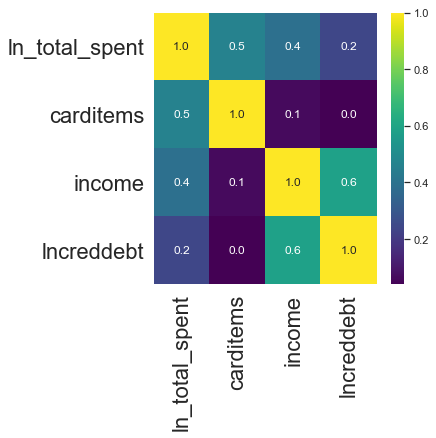

In [91]:
hp = PdfPages('heatmap plot for final continuous variables.pdf')

corrs = cust_data[['ln_total_spent','carditems','income','lncreddebt']].corr(method='spearman')
plt.subplots(figsize=(5,5))
sns.set(font_scale=1)
hmp = sns.heatmap(corrs,cmap='viridis', fmt=".1f",annot=True)

hp.savefig(hmp.get_figure())
hp.close() 


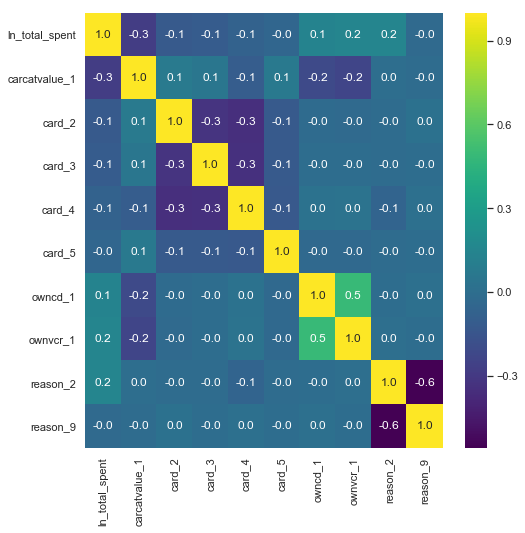

In [92]:
features = 'card_5+card_4+card_3+card_2+carcatvalue_1+reason_2+reason_9+ownvcr_1+owncd_1'.split('+')
features = sorted(features)
hp = PdfPages('heatmap plot for final categorical variables.pdf')

corrs = cust_data2[['ln_total_spent']+features].corr(method='spearman')
plt.subplots(figsize=(8,8))
sns.set(font_scale=1)
hmp = sns.heatmap(corrs,cmap='viridis', fmt=".1f",annot=True)

hp.savefig(hmp.get_figure())
hp.close() 

Card spent from Primary and Secondary card depends on :
        
    - owndvd     : Owns DVD
                   Those own DVD are likely to spend more with credit card.
                  
    - income     : Household income in thousands
                   If a user has high income he is likely to buy expensive items hence credit card spent would
                   be more.
                   Someone with high income is likely to value time and convenience more hence would spend more
                   with credit card.
                   
    - card       : Payment network
                   Payment network decides the charges incurred for intermediate service.
                   There are some payment network which also provide banking services.
                   Some banks have more premium customers than others and some payment network have easy
                   accessibility across countries than others. 
                   Overall pattern of user's spent depends on the kind of customer base
                   corresponding payment network has.
                   
    - lncreddebt : log of Credit card debt in thousands
                   If user has more debt on credit card then his credit card limit is more and likely to have
                   more income.
                   If user has more debt on credit card then s/he spends more with credit card and haven't
                   repaid.
                   
    - owncd      : Owns CD
                   Those own CD are likely to spend more with credit card
              
    - carcatvalue: Primary vehicle price category
                   Price category of car if a person owns relates to his/her expenses.
                   Person owning economic car likely to have less credit card spend as s/he would prefer more on
                   saving and likely to defer from buying expensive items.
                
    - reason     : Primary reason for being a customer here
                   Every user has a motive to opt for a service. If customer needs are met s/he would generate more
                   revenue.Some user prefers convenience, if process of payment and repay is easy they are
                   likely to use that service.
             
    - age        : People belonging to different age groups have different expenses hence display different credit card
                   spent pattern.
    
    - debtinc    : If debt to income ratio is high person is likely to spend less.